# Predicting Telecom Customer Churn
> _A Data Science project for a supervised machine learning capstone._

### David Booker-Earley
### 4/23/2020

---

# Introduction

#### Businesses compete throughout various industry fields. They use considerable amounts of resources to acquire and maintain the most customers. However, society changes over time, and so, too, does customer satisfaction.

>This makes resource allocation difficult when trying to prevent the alternative: when a customer "churns" by discontinuing their relationship with a business.

>Companies in their multitude could save money and time by knowing answers to the following questions beforehand:
* Which customers are likely to continue or discontinue?
* What factors affect these decisions from a customer's perspective?
* How can the company adapt with minimal projected loss?

>By tracking and predicting churn rates, an efficient company could use underlying patterns in data to not only calculate and project revenue, but also use a quantitative approach for making optimal decisions, implementing iterative improvements, and enhancing both customer acquisition and retention.

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

#### The goal of this project is to apply supervised machine learning solutions to predict whether a customer is at risk of churning.

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

#### This project will provide a basis for future prescriptive analysis or targeted marketing, along with some insight to which factors, on average, contribute to a customer's decision to churn or stay; as such, the findings might be interesting to the following:

>_Chief executive officers, data scientists, machine learning enthusiasts, and anyone who is inherently inquisitive._

---

# Data Overview

>The `Telecom Churn Dataset` from Kaggle, located [here](https://www.kaggle.com/zagarsuren/telecom-churn-dataset-ibm-watson-analytics), provides various factors that may help explain why some customers stop doing business with Telecommunications companies.

---

## Setup

In [0]:
import warnings
warnings.filterwarnings('ignore')


## Imports to load & explore the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time


## Imports to (pre-)process the data (model prep)
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample


## Imports for the construction and analysis of machine learning models
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score


## Settings & other preferences
%matplotlib inline
sns.set()

## Load and Preview Data

In [0]:
## Load and view data
link = "https://github.com/devid-davops/DS-Project-2/blob/master/Data/WA_Fn-UseC_-Telco-Customer-Churn.xlsx?raw=true"
df = pd.read_excel(link)


df.info()
print("\n")
print("Variables:")
print(df.columns)
print("\n")
print("Data Preview:")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
# View the last several row-entries
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Important Observations
>For the given data:
* There are $21$ columns and over $7,000$ customer-entries.
* The set consists mostly of categorical, text-based data.
* The `Senior Citizen` variable could be considered as categorical, where:
  * `0` translates to `False`
  * `1` translates to `True`
* The `Total Charges` variable has numerical data stored as a non-numerical object.
  * To maintain organization, this variable will be updated appropriately to be seen as a continuous data.

# Methods

## 1) Model Preparation

>_This section implements an iterative process involving data cleaning, data exploration, and feature selection._
* Exploratory data analysis (EDA)
* Feature engineering

In [0]:
churn_data = df.copy()

### Data Cleaning

#### Update Columns

>There are some inconsistencies with capitalization.
* Most of the given variables lead with capitalization, and some have mixed case, like `SeniorCitizen`.
* Updating variables that lead with a lower-case letter will help maintain organization.

In [0]:
# View column-names that begin with a lower-case letter
[var for var in list(df.columns) if not var[0].isupper()]

['customerID', 'gender', 'tenure']

In [0]:
# Capitalize the first letter of each string
churn_data.columns = [s[0].capitalize()+s[1:] for s in list(df.columns)]


print("Original column names:")
print(list(df.columns))
print()
print("Updated column names:")
print(list(churn_data.columns))

Original column names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Updated column names:
['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


#### Update Data Type

In [0]:
print("Number of entries per unique value:")
print()
churn_data['TotalCharges'].value_counts()

Number of entries per unique value:



           11
20.2       11
19.75       9
19.65       8
19.9        8
           ..
743.05      1
6733        1
4443.45     1
6735.05     1
4764        1
Name: TotalCharges, Length: 6531, dtype: int64

>All entries for `Total Charges` should be seen as continuous data.
* However, there are at least $11$ entries with empty text, which explains the aforementioned _data-type_ inconsistency.

In [0]:
empty_entries = churn_data[churn_data['TotalCharges']
                           .apply(lambda x: isinstance(x, str))].index


print("View entries containing empty text for 'TotalCharges':")
print()
print(churn_data.iloc[empty_entries, [-3, -2, -1]].info())
print()
churn_data.iloc[empty_entries, [-3, -2, -1]]

View entries containing empty text for 'TotalCharges':

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 488 to 6754
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MonthlyCharges  11 non-null     float64
 1   TotalCharges    11 non-null     object 
 2   Churn           11 non-null     object 
dtypes: float64(1), object(2)
memory usage: 352.0+ bytes
None



,MonthlyCharges,TotalCharges,Churn
488,52.55,,No
753,20.25,,No
936,80.85,,No
1082,25.75,,No
1340,56.05,,No
3331,19.85,,No
3826,25.35,,No
4380,20.00,,No
5218,19.70,,No
6670,73.35,,No


In [0]:
churn_data['TotalCharges'] = (
    pd
    .to_numeric(churn_data['TotalCharges'], errors='coerce')
)


print("Empty text has been transformed into NAN:")
print()
churn_data.iloc[empty_entries, [-3, -2, -1]]

Empty text has been transformed into NAN:



,MonthlyCharges,TotalCharges,Churn
488,52.55,NaN,No
753,20.25,NaN,No
936,80.85,NaN,No
1082,25.75,NaN,No
1340,56.05,NaN,No
3331,19.85,NaN,No
3826,25.35,NaN,No
4380,20.00,NaN,No
5218,19.70,NaN,No
6670,73.35,NaN,No


In [0]:
print("Review Updates")
print()
churn_data.info()

Review Updates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

>All text-based entries are now accounted for in this variable.

>Next, the new `NAN` values will be examined.

---

>Also, `df.info()` showed that there are many other columns with non-numerical `object` data. 
* Saving a list of these columns, along with a list of the numerical variables, will also help maintain organization.

In [0]:
numerical_names = list(churn_data
                       .select_dtypes(['float64', 'int64'])
                       .columns)

object_names = list(churn_data
                    .select_dtypes(['object'])
                    .columns)

print(f"{len(numerical_names)} Numerical Columns:\n{numerical_names}")
print()
print(f"{len(object_names)} Categorical Columns:\n{object_names}")

4 Numerical Columns:
['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']

17 Categorical Columns:
['CustomerID', 'Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


#### Account for Missing Values

>**Missing values** (`NULL`, `NAN`, etc.) in their multitude can significantly reduce the number of data points and create "gaps" in the sample population.
* Failure to appropriately handle too many `NANs` will reduce the accuracy of analysis and obstruct meaningful conclusions.
* Discarding a negligible amount, however, shouldn't result in a significant loss of valuable information or misleading conclusions.

>Thus, the relative quantity of `NANs` should be explored.

In [0]:
## Are there any missing values?
# Missing values can also be confirmed by viewing the "df.info()" results.
print("Are there any missing (NULL or NAN) values anywhere?")
print(churn_data.isna().any(axis=None))
print()
print("Which variables have missing values?")
print(churn_data.isna().any(axis=0))

Are there any missing (NULL or NAN) values anywhere?
True

Which variables have missing values?
CustomerID          False
Gender              False
SeniorCitizen       False
Partner             False
Dependents          False
Tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool


In [0]:
print("How many NANs are there per variable?\n")
churn_data.isna().sum()

How many NANs are there per variable?



CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [0]:
# Calculate % of NANs for each variable: (NANs / Total) * (100 %)
# Get a list of the variables with NANs.
na_percent = churn_data.isna().sum() / churn_data.isna().count() * 100
na_list = list( na_percent[ na_percent > 0 ].index )

print("Calculated percent % of missing values for each variable.\n")
print(na_percent)
print(f"\n\nList of {len(na_list)} variable(s) with NANs:\n")
na_list

Calculated percent % of missing values for each variable.

CustomerID          0.000000
Gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
Tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64


List of 1 variable(s) with NANs:



['TotalCharges']

>Only the updated `Total Charges` field contains missing values.

>Considering this variable is based on the accumulation of payments, its data can be considered as the `time series` type; in which, the values and observed patterns may change per unit of time.

>However, there is a negligible percentage of the sample population missing ($\le 0.2$%), and shouldn't significantly affect the underlying spread of data.

>**Other Remarks:**
* If the percentage were to be more significant ($\ge 5$%), `linear interpolation` would be the most suitable technique to fill out these missing values.
* Filling `NANs` using the `mean` or `median` might significantly change the overall spread of data by doing either of the following:
  * A) Over-saturating the quantity of `mean` or `median` values, thus, accidentally creating new `outliers`.
  * B) Shifting the `observed mean` away from the `actual mean` through accumulated error.

---

>Before continuing, conclusive evidence is needed to ensure that dropping `NANs` of this small proportion would yield negligible change. Through a simple experiment, statistics from `dropped NANs` will be compared with statistics from `filled NANs`.


<!-- ``` python
### Testing with the one variable

## Option A -- Drop NANs
Test_A_drop = churn_data['TotalCharges'].copy()
Test_A_drop = Test_A_drop.dropna()

print("For Option A")
print(">>> Have all of the NANs been dropped?")
print(Test_A_drop.isna().sum() == 0)
print()
print(">>> Calculated percent % of missing values:")
print(Test_A_drop.isna().sum() / Test_A_drop.isna().count() * 100)


print('\n')
print('-'*70)
print('\n')


## Option B -- Fill missing values using interpolation
Test_B_fill = churn_data['TotalCharges'].copy()
Test_B_fill = Test_B_fill.fillna(Test_B_fill.interpolate())

print("For Option B")
print(">>> How many NANs are there after filling them?")
print(Test_B_fill.isna().sum())
print()
print(">>> Calculated percent % of missing values:")
print(Test_B_fill.isna().sum() / Test_B_fill.isna().count() * 100)


print('\n')
print('-'*70)
print('\n')


print("Compare Statistics")
print()
print("**** After Dropping Missing Values ****")
print(f"Shape: {Test_A_drop.shape}")
print(Test_A_drop.describe())
print()
print()
print("**** After Filling Missing Values via Interpolation ****")
print(f"Shape: {Test_B_fill.shape}")
print(Test_B_fill.describe())
``` -->

In [0]:
### Testing with the entire set of data

## Option A -- Drop NANs
Test_A_drop = churn_data.copy()
Test_A_drop = Test_A_drop.dropna()

print("For Option A")
print(">>> Have all of the NANs been dropped?")
print(Test_A_drop.isna().sum() == 0)
print()
print(">>> Calculated percent % of missing values:")
print(Test_A_drop.isna().sum() / Test_A_drop.isna().count() * 100)


print('\n')
print('-'*70)
print('\n')


## Option B -- Fill missing values using interpolation
Test_B_fill = churn_data.copy()
Test_B_fill = Test_B_fill.fillna(Test_B_fill.interpolate())

print("For Option B")
print(">>> How many NANs are there after filling them?")
print(Test_B_fill.isna().sum())
print()
print(">>> Calculated percent % of missing values:")
print(Test_B_fill.isna().sum() / Test_B_fill.isna().count() * 100)


print('\n')
print('-'*70)
print('\n')


print("Compare Statistics")
print()
print("**** After Dropping Missing Values ****")
print(f"Shape: {Test_A_drop.shape}")
print(Test_A_drop.describe())
print()
print()
print("**** After Filling Missing Values via Interpolation ****")
print(f"Shape: {Test_B_fill.shape}")
print(Test_B_fill.describe())

For Option A
>>> Have all of the NANs been dropped?
CustomerID          True
Gender              True
SeniorCitizen       True
Partner             True
Dependents          True
Tenure              True
PhoneService        True
MultipleLines       True
InternetService     True
OnlineSecurity      True
OnlineBackup        True
DeviceProtection    True
TechSupport         True
StreamingTV         True
StreamingMovies     True
Contract            True
PaperlessBilling    True
PaymentMethod       True
MonthlyCharges      True
TotalCharges        True
Churn               True
dtype: bool

>>> Calculated percent % of missing values:
CustomerID          0.0
Gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
Tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contra

>After comparing the respectively calculated statistics, it is clear that dropping the `NANs` in this variable yield negligible change.

>The statistics for the entire set of data are identical for both options. Thus, the $11$ entries with `NANs` can be dropped without a significant loss of valuable information.

In [0]:
churn_data = churn_data.dropna()

churn_data.info()
print()
churn_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7032 non-null   object 
 1   Gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   Tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Account for Outliers

>**Outliers** can significantly change the _statistical spread_ of data, which can negatively influence analysis and any resulting conclusions; only **cleaned data**, which accounts for all outliers, should be used to capture central tendencies.

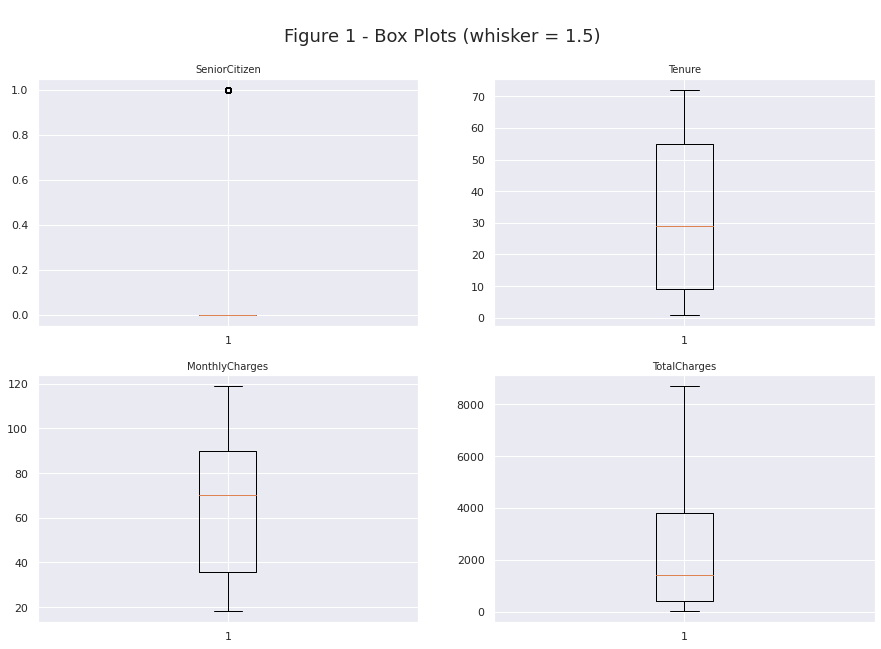

In [0]:
## Setup for multiple plots
# This can also be done using dictionary comprehension
sns.set()
plt.figure(figsize=(15,10))
whis = 1.5
plt.suptitle(f"\nFigure 1 - Box Plots (whisker = {whis})", fontsize=18)

# Dimensions for plot window that houses subplots
dim_row = 2; dim_col = 2;


## Plot Box Plots to see outliers
for i, var in enumerate(numerical_names, 1):
  plt.subplot(dim_row, dim_col, i)  # update grid based on number of vars
  plt.boxplot(churn_data[var], whis=whis)
  plt.title(var, {'fontsize': 10})

plt.show();

>After plotting outliers as individual data points for each **numerical** variable, it is clear that there are no extreme values. 
* The categorical variable `Senior Citizen` has only two values, where most values equal $0$.

>Further exploration can occur now that the data has been examined for mistakes.

### Exploration

#### Univariate Exploration

* Investigating data for a given (continuous or categorical) variable

##### Identify the `target` variable

>The **categorical** target variable is `Churn`.
* Thus, the task of making predictions will be formulated a `classification problem`.

In [0]:
target = 'Churn'

print("""How many values are there for each category?
More specifically, how many customers "churn"?
""")
churn_data[target].value_counts()

How many values are there for each category?
More specifically, how many customers "churn"?



No     5163
Yes    1869
Name: Churn, dtype: int64

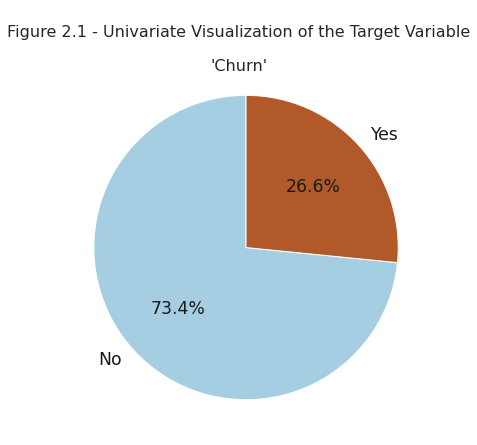

In [0]:
## Univariate Visualization

## Visualize the "spread" of Categorical Variables

# Pie Chart of the Target
# A "Word Cloud" could also be shown, but there are only two values.
plt.figure(figsize=(8,7))
plt.suptitle(f"""
Figure 2.1 - Univariate Visualization of the Target Variable

'{target}'
""", fontsize=16)

textprops = {'size': 'x-large',
             'color': 'k',}

(churn_data[target]
 .value_counts()
 .plot
 .pie(autopct='%1.1f%%',
     startangle=90,
     textprops=textprops,
     cmap='Paired'))

plt.xlabel('')
plt.ylabel('')

plt.show();

>Shown by the analysis and pie chart, the data consists mostly ($>70$%) of customers who don't churn.

>Knowing that most people in this sample population continue doing business with a given company, steps will be taken later to ensure each category is equally represented in the modeling phase (e.g., class balancing).

##### Univariate Analysis for other Variables

In [0]:
print("""Univariate Analysis: Descriptive Statistics for Cleaned Data.

Central tendencies for the continuous variables:
""")
churn_data.describe()

Univariate Analysis: Descriptive Statistics for Cleaned Data.

Central tendencies for the continuous variables:



,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [0]:
print("""Univariate Analysis: Descriptive Statistics for Cleaned Data.

Central tendencies for the categorical (text-based) variables:
""")
churn_data.describe(include=['O'])  # capital letter 'O' for object-data

Univariate Analysis: Descriptive Statistics for Cleaned Data.

Central tendencies for the categorical (text-based) variables:



,CustomerID,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,9223-UCPVT,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


##### Univariate Visualization

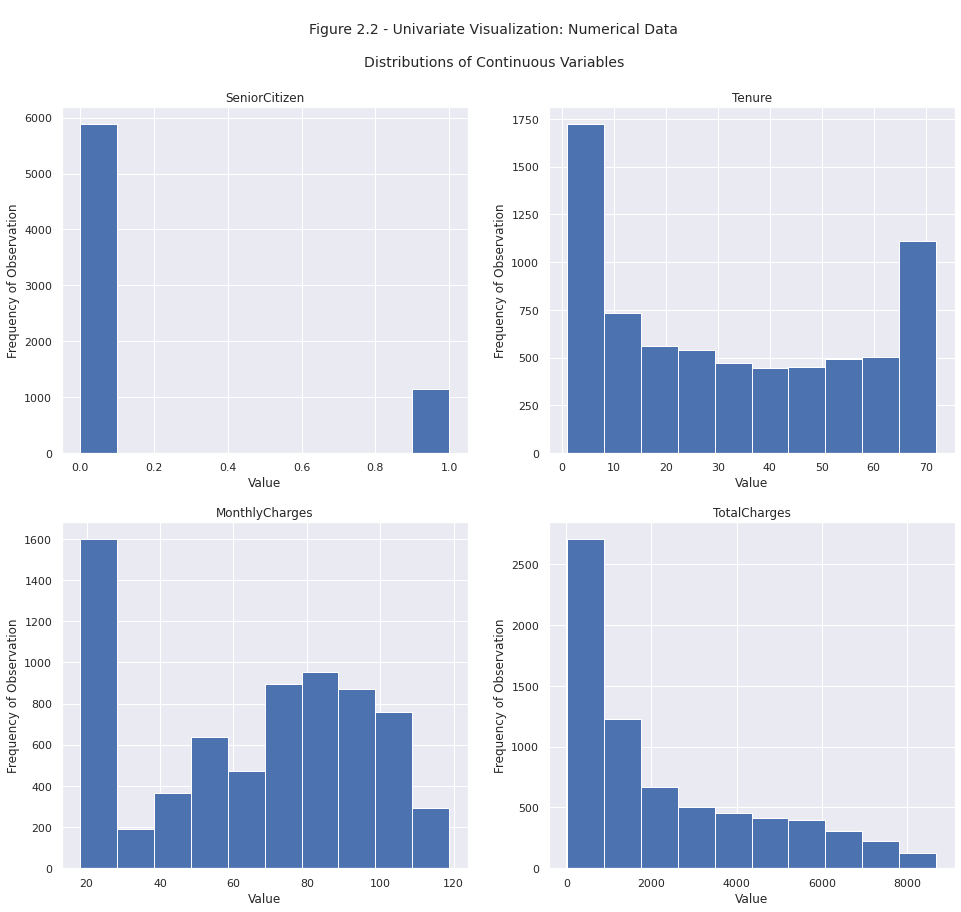

In [0]:
## Univariate Visualization

# Plot Distributions (histograms) of the numerical data
plt.figure(figsize=(16,14))
plt.suptitle("""
Figure 2.2 - Univariate Visualization: Numerical Data

Distributions of Continuous Variables
""", fontsize=14)

for i, var in enumerate(numerical_names, 1):
  plt.subplot(dim_row, dim_col, i)  # update grid based on number of vars
  plt.hist(churn_data[var])
  plt.title(var, {'fontsize': 12})
  plt.xlabel("Value")
  plt.ylabel("Frequency of Observation")

plt.show();

>With the more dominant category being `0`, most customers were not `Senior Citizens`.

>The _max_ for `Monthly Charges` was $\$118.75$, which was almost the _mean_ value doubled.
* However, the _max_ for `Total Charges` was $\$8,684.80$, which was almost four times the calculated _mean_ ($\$2,283.30$).
* As seen in the plots, `Total Charges` gradually decreased across the sample population; however, the range of `Monthly Charges` noticeably varied in both payment amount and the number of customers making the payment.
  * Further inspection for these variables might provide insight into why some customers have churned.

>Also, many of the plotted variables don't appear to follow a (nearly) normal distribution.
* They will be transformed through _Standardization_ before being included as model features.

---

##### Next, the categorical variables can be explored by comparing respective quantities of observed categories.

In [0]:
print("How many unique categories are there per Categorical Variable?\n")
feature_data = churn_data.copy()
feature_data[object_names].nunique()

How many unique categories are there per Categorical Variable?



CustomerID          7032
Gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

>`Customer ID` is categorical; however, as the name implies, each value from this field represents one customer.
* Due to its composition, it's not essential for predictions and will be excluded from the feature set in each model.

>`Churn` is the target that each model will predict; thus, it will be excluded from the feature set.

>The remaining categorical variables will be explored next.
* However, before proceeding with feature selection in a later step, yet prior to the modeling phase, these variables will be transformed into numerical Boolean values.

In [0]:
object_names = object_names[1:-1]

print("Categorical Variables retained for the next steps:\n")
object_names

Categorical Variables retained for the next steps:



['Gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

###### Consider, for example, the three categories for `Internet Service`.

>Which category has the most entries?

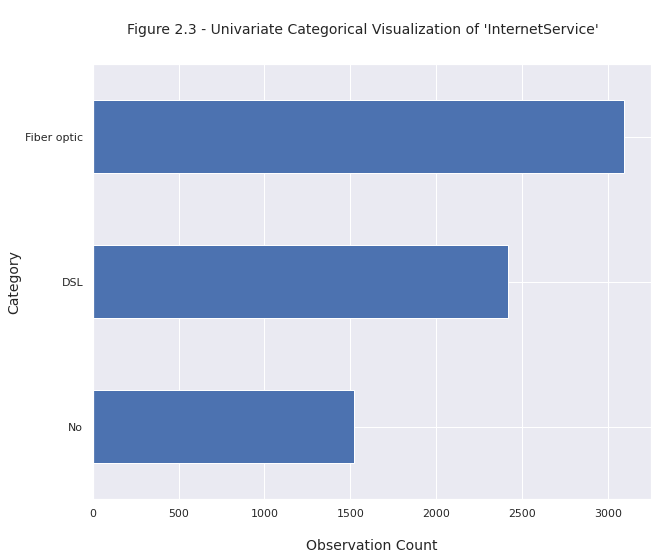

In [0]:
test_col = 'InternetService'
plt.figure(figsize=(10,8))
plt.suptitle(f"""
Figure 2.3 - Univariate Categorical Visualization of '{test_col}'
""", fontsize=14)

(churn_data[test_col]
 .value_counts(ascending=True)
 .plot(kind='barh'))

plt.xlabel('\nObservation Count', size=14)
plt.ylabel('Category', size=14)

plt.show();

>Based on this _bar chart_, the most frequently purchased `Internet Service` was _Fiber Optic_.

---

###### How does the data separate into the other categorical variables?

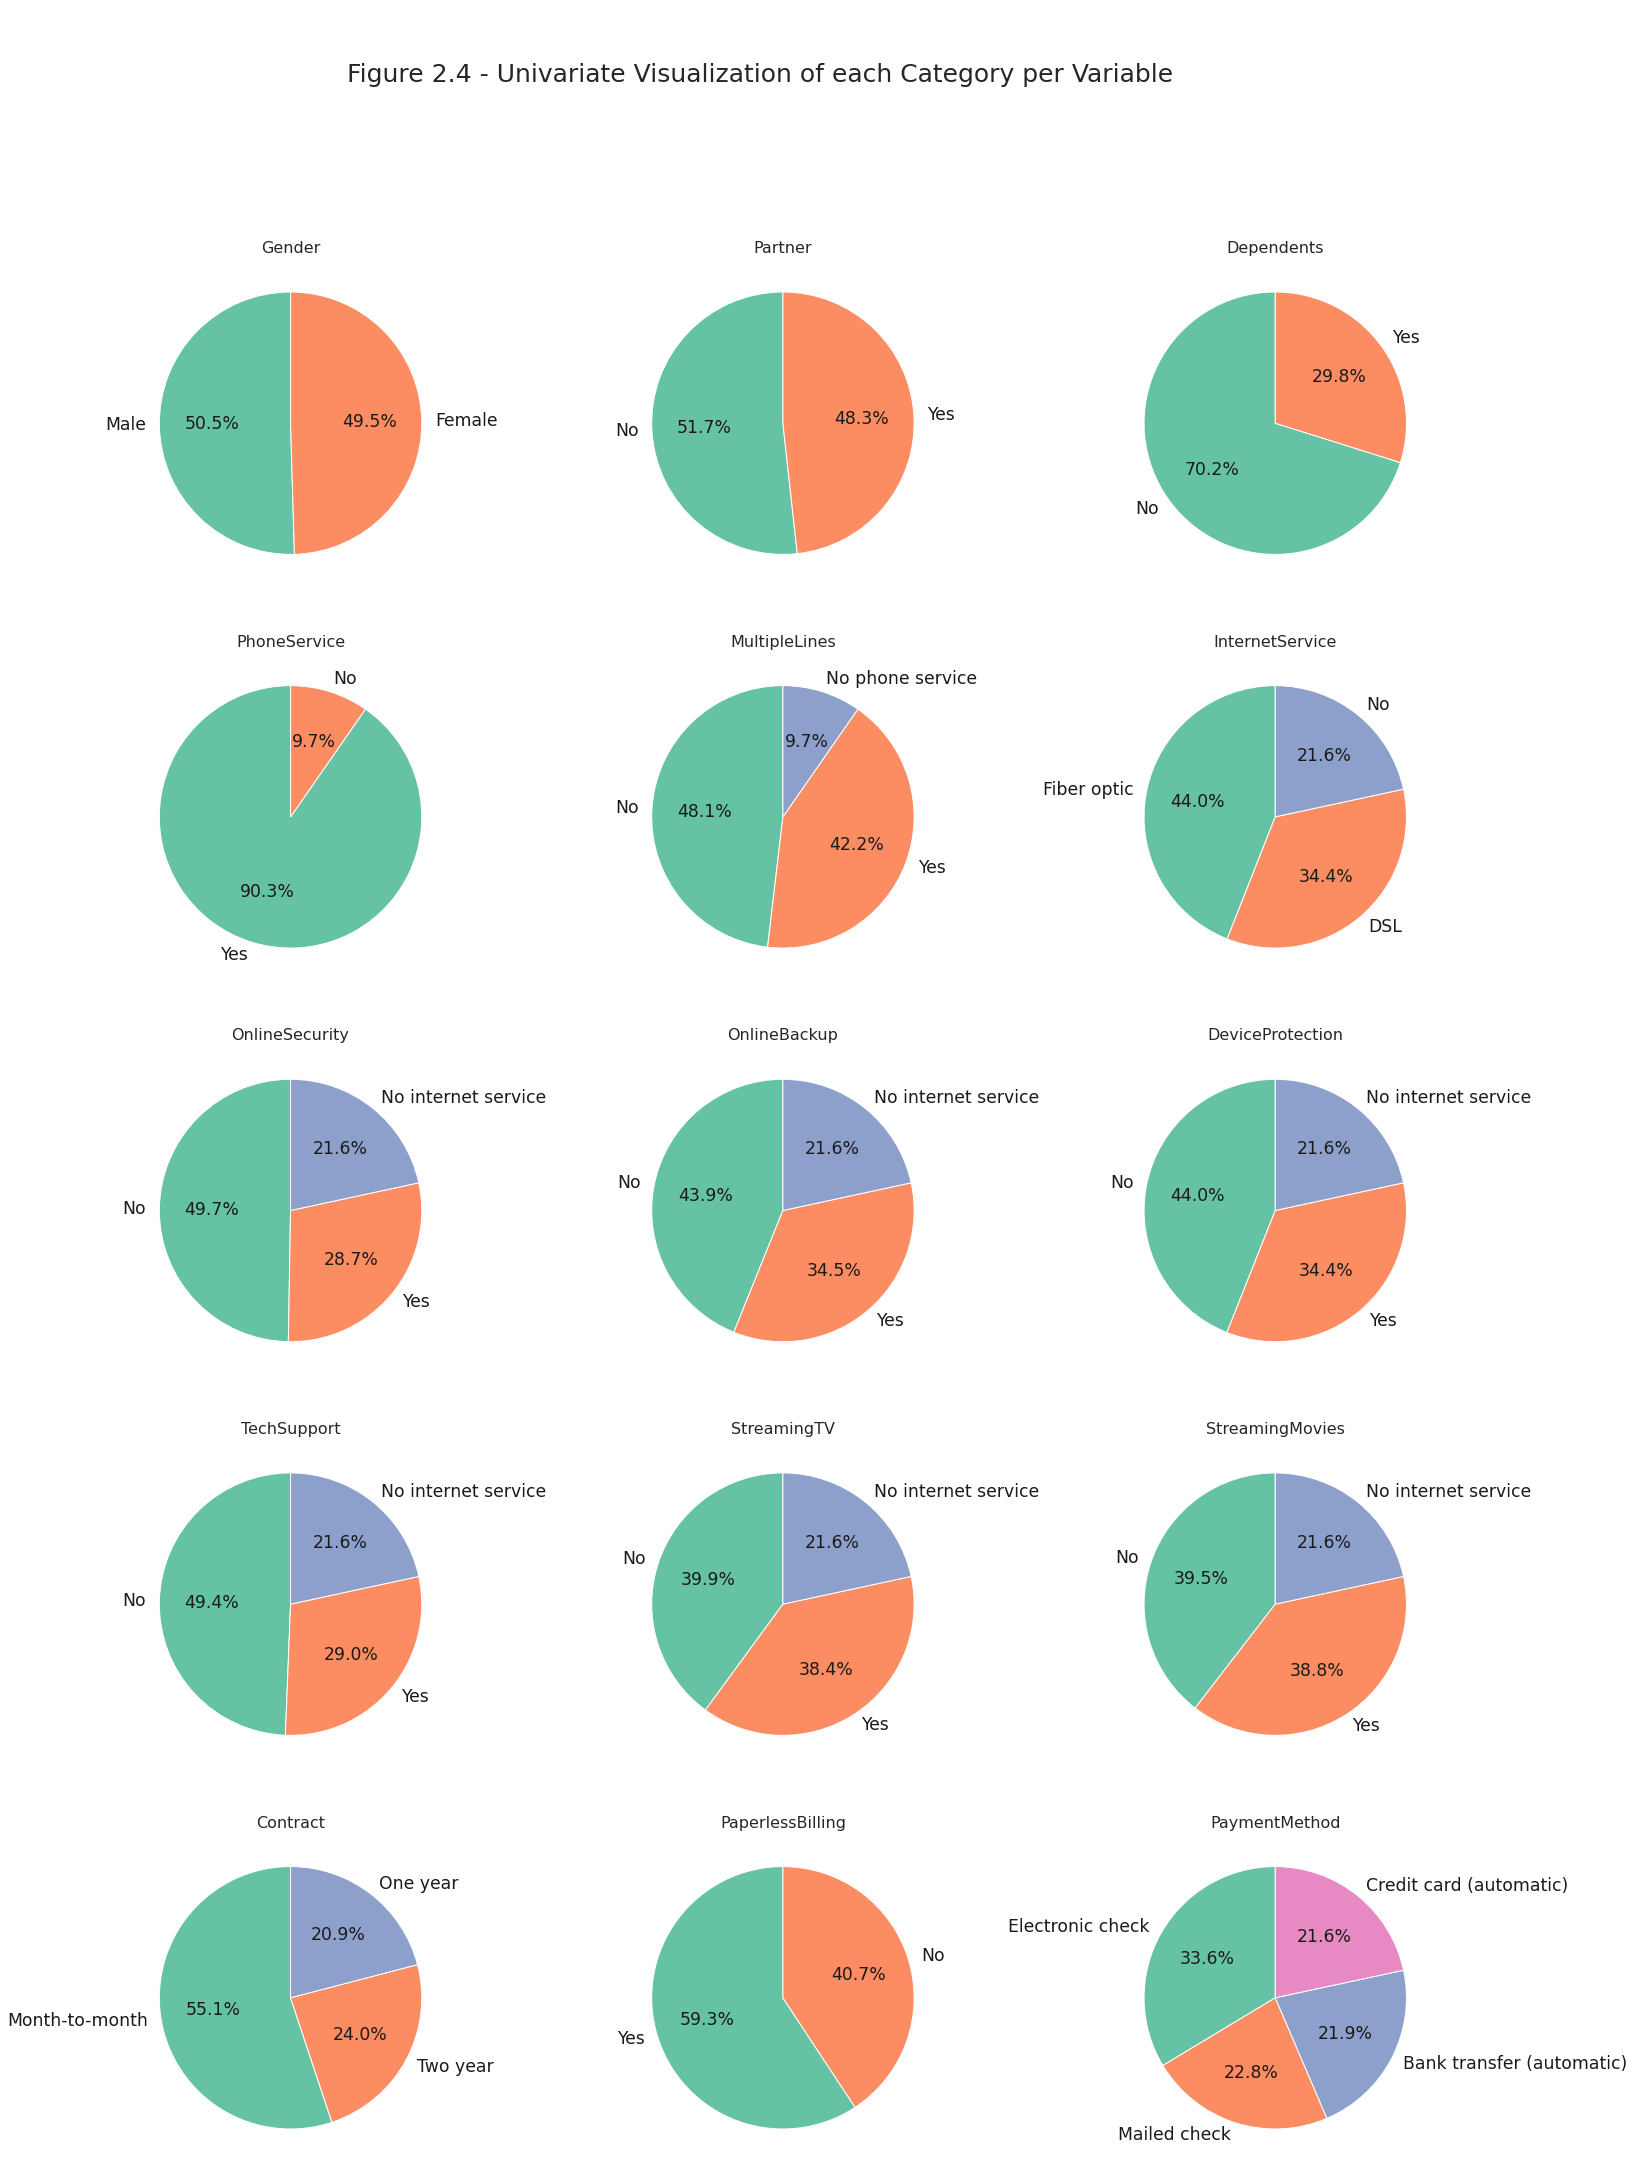

In [0]:
## Univariate Visualization

# Plot Pie Charts of the Categorical data
sns.set_palette('Set2')
plt.figure(figsize=(25,35))
plt.suptitle("""\n
Figure 2.4 - Univariate Visualization of each Category per Variable
""", fontsize=25)

for i, var in enumerate(object_names, 1):
  plt.subplot(5, 3, i)
  (churn_data[var]
   .value_counts()
   .plot
   .pie(autopct='%1.1f%%',
        startangle=90,
        textprops=textprops))
  plt.xlabel('')
  plt.ylabel('')
  plt.title(var, {'fontsize': 16})

plt.show();

>These pie charts indicate the existence of _class imbalance_ throughout the categorical variables.
* `Phone Service` consists mostly ($\ge90$%) of customers with this option, approximately $48$% have `Multiple Lines`, while only $30$% of customers have `Dependents`.

>If all categories (classes) are not equally represented, class imbalance could create unintended favoritism toward the categories containing more observations.
* Depending on the rigor of a given model, predictions would take the value of the more dominant class; this would result in a high, yet misleading, accuracy score alongside low recall (the proportion of positives that were correctly predicted).

>As such, classes will be balanced prior to the modeling phase.

#### Bivariate Exploration

* Comparing data from at least two variables

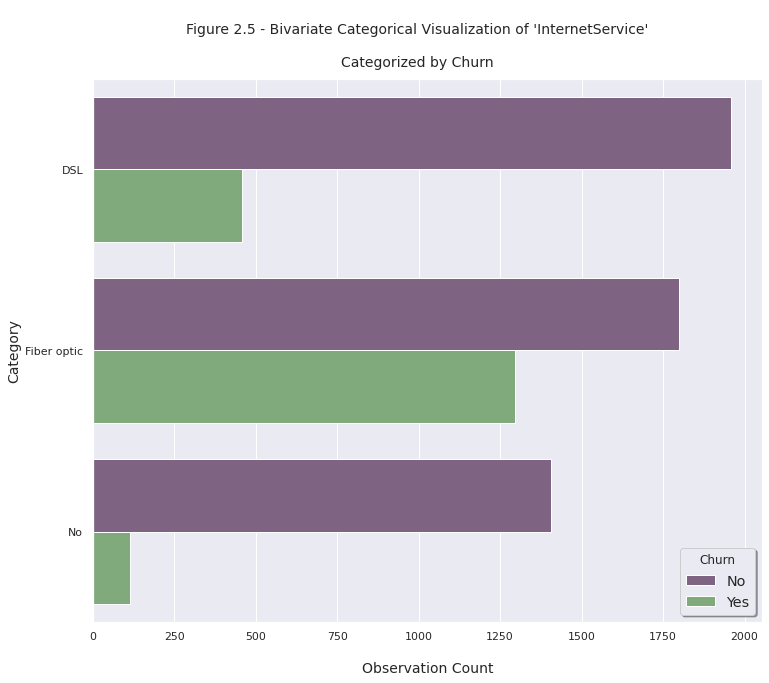

In [0]:
# Plot counts for each combination of levels.
sns.set_palette(sns.xkcd_palette(["dusty purple", "faded green"]))
plt.figure(figsize=(12,10))
plt.suptitle(f"""
Figure 2.5 - Bivariate Categorical Visualization of '{test_col}'

Categorized by Churn
""", fontsize=14)

ax = sns.countplot(y=test_col, hue=target, data=churn_data)
plt.xlabel('\nObservation Count', size=14)
plt.ylabel('Category', size=14)

# Customize Legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=labels,
    loc='lower right',
    fontsize='large',
    shadow=True,
    title='Churn',
)

plt.show();

>Although _Fiber Optic_ was the most popular option, it had the most `customer churns`, while `DSL` had the highest `non-churns` and the second lowest `customer churns`.

>These figures suggest that customers with the `DSL` and `No Internet Service` options were more satisfied overall and remained as customers.

---

>How does `Gender` affect these options and the `target`?

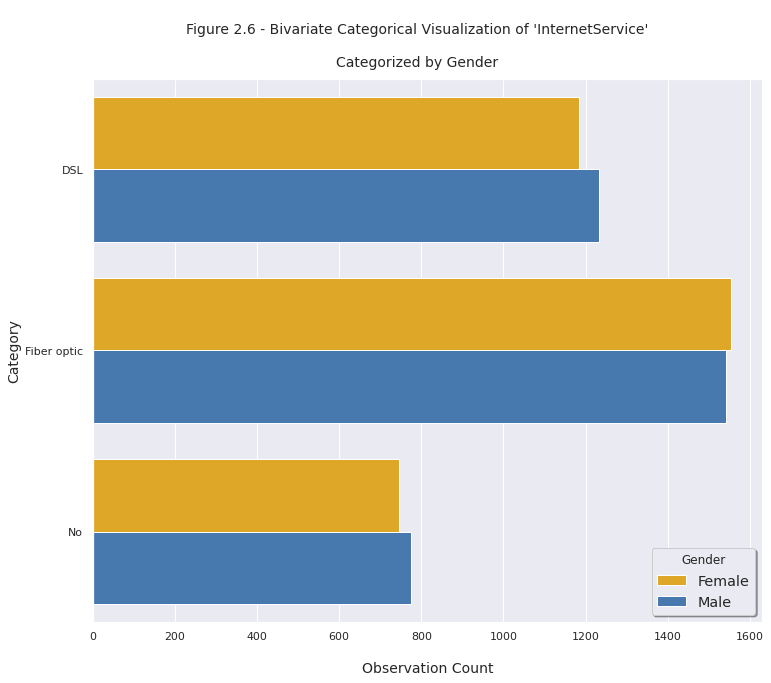

In [0]:
# Plot counts for each combination of levels.
sns.set_palette(sns.xkcd_palette(["amber", "windows blue"]))
plt.figure(figsize=(12,10))
plt.suptitle(f"""
Figure 2.6 - Bivariate Categorical Visualization of '{test_col}'

Categorized by Gender
""", fontsize=14)

ax = sns.countplot(y=test_col, hue='Gender', data=churn_data)
plt.xlabel('\nObservation Count', size=14)
plt.ylabel('Category', size=14)

# Customize Legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=labels,
    loc='lower right',
    fontsize='large',
    shadow=True,
    title='Gender',
)

plt.show();

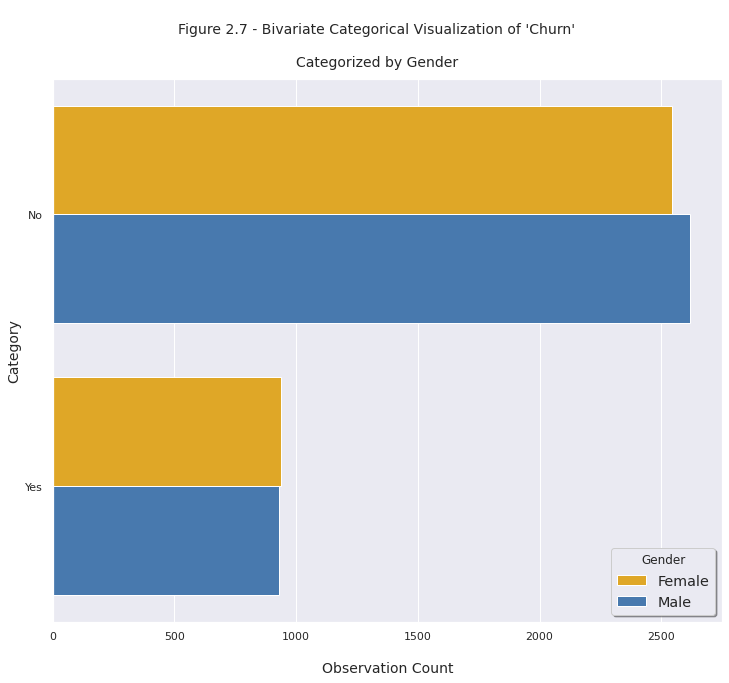

In [0]:
# Plot counts for each combination of levels.
sns.set_palette(sns.xkcd_palette(["amber", "windows blue"]))
plt.figure(figsize=(12,10))
plt.suptitle(f"""
Figure 2.7 - Bivariate Categorical Visualization of '{target}'

Categorized by Gender
""", fontsize=14)

ax = sns.countplot(y=target, hue='Gender', data=churn_data)
plt.xlabel('\nObservation Count', size=14)
plt.ylabel('Category', size=14)

# Customize Legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=labels,
    loc='lower right',
    fontsize='large',
    shadow=True,
    title='Gender',
)

plt.show();

>The two figures `categorized by Gender` offer simple, yet important, insight; there were slightly more female customers who chose the _Fiber Optic_ option, but the difference could be considered negligible with respect to each sample population's total observation count.

>Similarly, the `target` does not seem to significantly change across the `Gender` variable.


---

##### Does `churn status` differ across `Charges`?

###### `Monthly Charges`

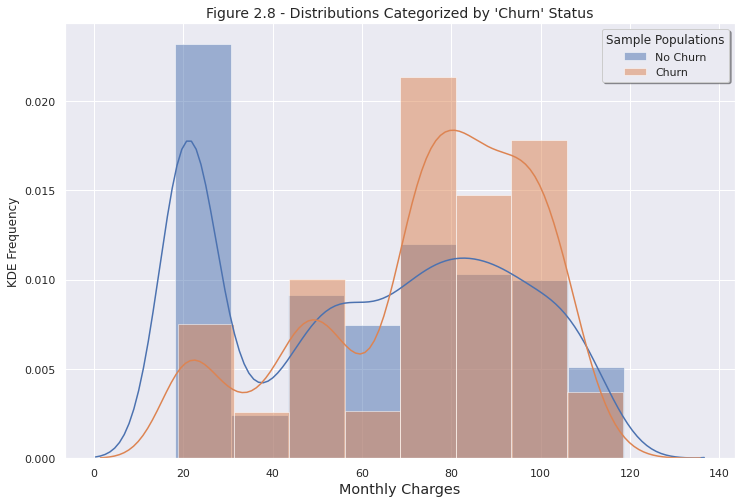

In [0]:
## Visualize sample population distributions
sns.set()

var_0 = churn_data.loc[churn_data[target]=='No', 'MonthlyCharges']
var_1 = churn_data.loc[churn_data[target]=='Yes', 'MonthlyCharges']

s="Figure 2.8 - Distributions Categorized by 'Churn' Status"
plt.figure(figsize=(12,8))
bins = 8
ax1 = sns.distplot(var_0,
                   bins=bins,
                   kde=True,  #Plots a kernel density estimate curve
                   rug=False,  #Plots a tiny vertical tick per observation
                   label='No Churn',
                   hist_kws={'alpha': 0.5})  #Changes transparency of plot
sns.distplot(var_1,
             kde=True,
             rug=False,
             bins=bins,
             label='Churn',
             hist_kws={'alpha': 0.5},
             ax=ax1)
plt.legend(loc='upper right', title='Sample Populations', shadow=True)
plt.xlabel('Monthly Charges', {'fontsize': 'large'})
plt.ylabel('KDE Frequency')
plt.title(s, {'fontsize': 14})
plt.show;

In [0]:
## Get the statistics
print("No Churn")
print(var_0.describe())
print()
print("Churn")
print(var_1.describe())

No Churn
count    5163.000000
mean       61.307408
std        31.094557
min        18.250000
25%        25.100000
50%        64.450000
75%        88.475000
max       118.750000
Name: MonthlyCharges, dtype: float64

Churn
count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64


>On average, `Monthly Charges` were nearly $\$13$ more for customers who decided to `churn` than the customers who stayed.
* There is a significant spike in the customers who stayed for the lower range of $\$20$ to $\$30$ per month.
  * This might be the result of a new savings deal (e.g., bundle, service, etc.)
* A noticeable amount of the customers who `churned` were paying $\$70$ to $\$110$ per month.

---

>**Important Observations**
* The `Tenure` data provides the _duration_ of maintained customer status.
* However, it doesn't explain the respective _start-end_ dates that might overlap between customers with larger payments and those with lower payments per `churn status`.
* Additional patterns could be illustrated if this set contained dated information.
  * As an example, an insightful comparison could be that of _dated price (monthly or per service)_ and _dated churn status_.

---

###### `Total Charges`

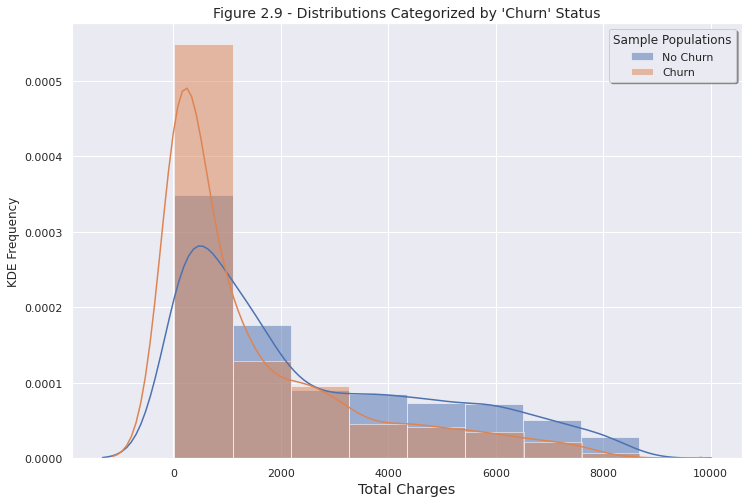

In [0]:
## Visualize sample population distributions
var_0 = churn_data.loc[churn_data[target]=='No', 'TotalCharges']
var_1 = churn_data.loc[churn_data[target]=='Yes', 'TotalCharges']

s="Figure 2.9 - Distributions Categorized by 'Churn' Status"
plt.figure(figsize=(12,8))
bins = 8
ax1 = sns.distplot(var_0,
                   bins=bins,
                   kde=True,  #Plots a kernel density estimate curve
                   rug=False,  #Plots a tiny vertical tick per observation
                   label='No Churn',
                   hist_kws={'alpha': 0.5})  #Changes transparency of plot
sns.distplot(var_1,
             kde=True,
             rug=False,
             bins=bins,
             label='Churn',
             hist_kws={'alpha': 0.5},
             ax=ax1)
plt.legend(loc='upper right', title='Sample Populations', shadow=True)
plt.xlabel('Total Charges', {'fontsize': 'large'})
plt.ylabel('KDE Frequency')
plt.title(s, {'fontsize': 14})
plt.show;

In [0]:
## Get the statistics
print("No Churn")
print(var_0.describe())
print()
print("Churn")
print(var_1.describe())

No Churn
count    5163.000000
mean     2555.344141
std      2329.456984
min        18.800000
25%       577.825000
50%      1683.600000
75%      4264.125000
max      8672.450000
Name: TotalCharges, dtype: float64

Churn
count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: TotalCharges, dtype: float64


>On average, `Total Charges` were nearly $\$1,000$ less for customers who decided to `churn` than the `no churn` customers.

>These figures show intuitive, yet interesting, insight:
* Many of the customers who decided to `churn` were paying more per month for their respective services.
* Customer satisfaction, in this case could be reflected by both the _quality of service-amenities_, along with the _amount of money charged per month to access them_.

---

##### Correlation Visualization

>The variables for `charges` are likely not independent; to maximize model performance later, these two could be combined based on their relationships with one another or the target.

>An overlap in explained variance might exist elsewhere; thus, the following _heat map_ illustrates **inter-feature correlations** for the numerical data.
* $\color{lightblue}{\text{Low (possibly negative) correlations are shown in shades of blue.}}$
* $\color{orange}{\text{Highly positive correlations are shown in shades of red or orange.}}$

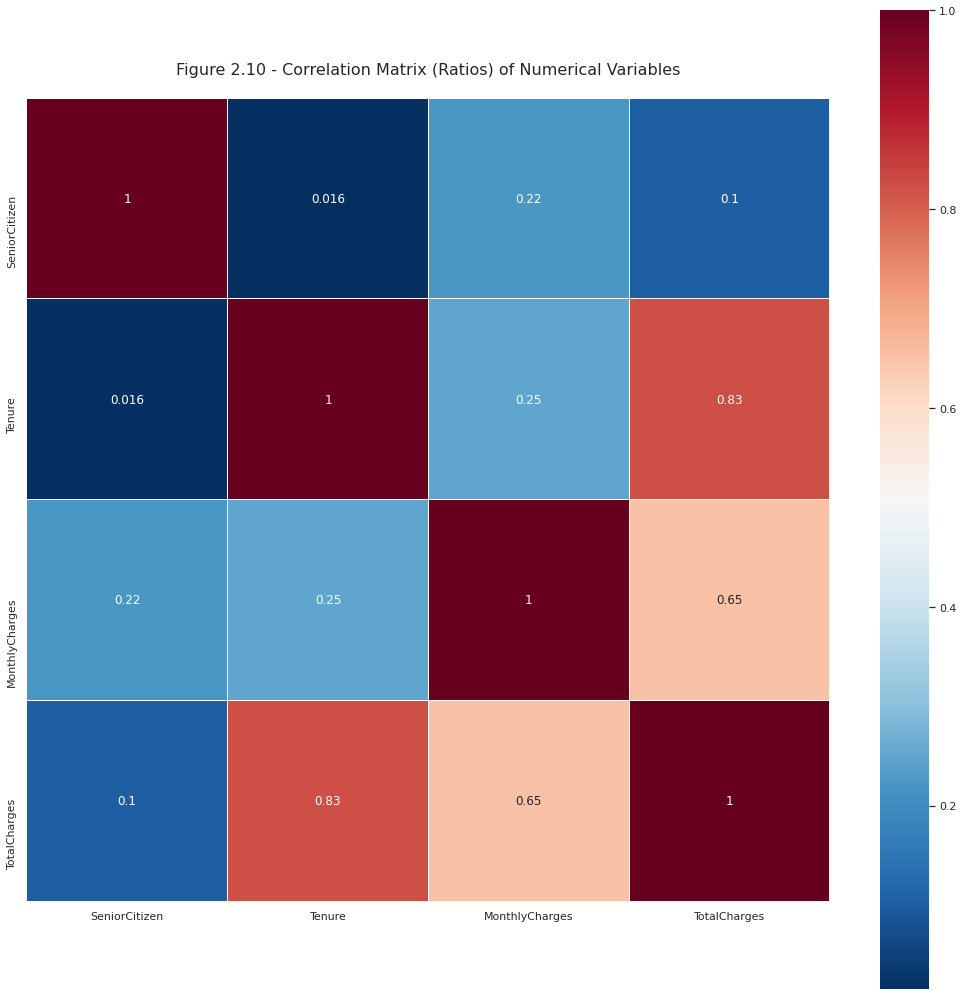

In [0]:
s = "Figure 2.10 - Correlation Matrix (Ratios) of Numerical Variables\n"

plt.figure(figsize=(18,18))
sns.heatmap(churn_data[numerical_names].corr(),
            square=True,
            annot=True,
            linewidths=.5,
            cmap='RdBu_r')  # good color palettes: BrBG, coolwarm, RdBu_r
plt.title(s, fontsize=16)
plt.show();

>There are some intuitive, yet interesting, correlations presented.

>The bottom right corner of the plot shows some relatively high inter-feature correlations:
* `Monthly Charges` and `Total Charges`: $65$% correlation
* `Tenure` and `Total Charges`: $83$% correlation
  * Note that, even though there are some relatively low correlations, there are zero feature pairs with negative correlations; the underlying relationship for each pair exists with some positive influence.

>The observed **collinearity** will be accounted for during the feature selection steps.

### Convert from `categorical` to `numerical` equivalents

>The learning models will expect numerical data.
* Thus, before the modeling phase, categorical variables that will be used as _model features_ should be updated.

In [0]:
def convert_cat_to_num(col, df, dummy_names):
  """
  Convert categorical variables into numerical data
  using one hot encoding through 'get_dummies'.
  
  The df is updated with the new dummy columns.
  
  The list of dummy column names is also updated.
  """
  
  df = pd.concat([df,
                  pd.get_dummies(df[col],
                                 prefix=col,
                                 drop_first=True)],
                 axis=1)
  
  dummy_names += list(pd.get_dummies(df[col],
                                     prefix=col,
                                     drop_first=True).columns)
  
  return df

In [0]:
dummy_column_names = list()

for cat in object_names:
  feature_data = convert_cat_to_num(col=cat,
                                    df=feature_data,
                                    dummy_names=dummy_column_names)

# Preview results
print(f"There are {len(dummy_column_names)} dummy columns.")
print()
print(f"Old DataFrame Shape: {churn_data.shape}")
print(f"New DataFrame Shape: {feature_data.shape}")
print()
feature_data.info()
print()
feature_data.head()

There are 26 dummy columns.

Old DataFrame Shape: (7032, 21)
New DataFrame Shape: (7032, 47)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             7032 non-null   object 
 1   Gender                                 7032 non-null   object 
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   object 
 4   Dependents                             7032 non-null   object 
 5   Tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   object 
 7   MultipleLines                          7032 non-null   object 
 8   InternetService                        7032 non-null   object 
 9   OnlineSecurity                         7032 no

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


>`Senior Citizen` will need to resemble the other categorical features.
* It's already split into `0` and `1` (`False` and `True`, respectively), but these categories should exist as their own features.
* The following updates convert `Senior Citizen` in a manner similar to that of the other binary categorical variables.

In [0]:
# Convert to object to apply one hot encoding.
col = 'SeniorCitizen'
feature_data[col] = feature_data[col].apply(str)

feature_data = convert_cat_to_num(col=col,
                                  df=feature_data,
                                  dummy_names=dummy_column_names)

# Preview updates
print(f"Updated DataFrame Shape: {feature_data.shape}")
print("Preview:\n")
feature_data.head()

Updated DataFrame Shape: (7032, 48)
Preview:



,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


>The following updates will unify the spelling of all new _dummy-category-variables_.

In [0]:
# Replace whitespaces with underscores for the list of strings
for i in range(len(dummy_column_names)):
  dummy_column_names[i] = '_'.join(dummy_column_names[i].split())

# Similarly, update df columns
feature_data.rename(columns=lambda s: '_'.join(s.split()), inplace=True)

# Check for equality
print("Have all variables been updated?")
dummy_column_names==list(feature_data.columns[-len(dummy_column_names):])

Have all variables been updated?


True

In [0]:
feature_data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No_phone_service,MultipleLines_Yes,InternetService_Fiber_optic,InternetService_No,OnlineSecurity_No_internet_service,OnlineSecurity_Yes,OnlineBackup_No_internet_service,OnlineBackup_Yes,DeviceProtection_No_internet_service,DeviceProtection_Yes,TechSupport_No_internet_service,TechSupport_Yes,StreamingTV_No_internet_service,StreamingTV_Yes,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_One_year,Contract_Two_year,PaperlessBilling_Yes,PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,SeniorCitizen_1
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


## 2) Split Data

>The modeling phase is imminent. However, before making models or predictions, the data should be optimized.

>Also, regarding the lack of normality in the features' respective distributions, **Standardization** should help by scaling most of the data to a smaller interval.

---

### Important Observations on Optimization

#### Reduce Overfitting

>A useful model would be able to learn and sufficiently generalize its predictions based on discovered patterns in the given data.

>To ensure proper learning, data should be split into `training` and `testing` sets.
* This approach ensures that each model will be tested on previously unseen records.
* Training and testing on the same data will result in a higher risk of overfitting.

>The performance of an **overfitted** model would be exceptionally good on the training set.
* However, when new data is given to it, this overly complex model would fail to generalize its predictions.
  * Thus, an overfitted model would fail to adapt to the needs of a new, similar problem.
* If the model is excessively complex, it will tend to overfit the training set.
* Inversely, if the model is insufficiently complex, it will tend to underfit.

. . . . .

>As such, to reduce potential overfitting, the following steps will be implemented:
* $20$% of the data will be reserved for the `test` set.
* A random state value will only be used for the **split** function.
  * This will ensure that the `train-test split` results are repeatable throughout multiple iterations.
* Iterations of **Cross Validation** will be applied and will tune model parameters as it learns.
  * This will also provide estimations for how each model might perform on new data (i.e., the testing set).

---


#### Fix Class Imbalance

>To balance the classes in the training data, **oversampling** will be used.
* This approach will increase the number of occurrences for the _minority_ class to match that of the _majority_ class.
* A random state value will be used for repeatable results.
  * **Note:** Resampling will only be applied on the _training set_ to maintain authenticity in the _testing set_.



---


#### Capture Variance

>Variable pairs with a high **inter-feature correlation** might explain the same pattern of variance in the data.
* Consider, for example, a given model that attempts to predict a solution based on highly correlated input-features.
* Due to the overlap among some variables, the model might allocate portions (perhaps half) of explanatory power to each feature in a highly correlated pair.

. . . . .

>When making predictions is the only goal, variance overlap, and the resulting division of explanatory power, won't present a significant problem; what matters most is that the variance is sufficiently explained to ensure that the model can learn.
* However, due to present collinearity, knowing which of the features matter most when predicting an outcome could become difficult; the respective relationships between features and target values could be underestimated.

---


### Maximize Model Performance (Recap)

>Both quality and quantity of featured data should be optimized.
* Data will be split into _training_ and _testing_ sets.
* Standardization will be applied.
* Oversampling will be used for class balancing.
* Dimensionality Reduction will be applied, and collinearity will be accounted for (thus, reducing overall complexity).
* Cross Validation will be used.

### Performing the Split

In [0]:
# Y is the target variable.
Y = feature_data[target]

# X is the feature set which includes desired variables for the model.
explanatory_vars = numerical_names[1:] + dummy_column_names
X = feature_data[explanatory_vars]

In [0]:
# Preprocess dataset. Split into a set for training & a set for testing.
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 465)

# Inspect the results.
print("The number of observations in training set is {}"
    .format(X_train.shape[0]))
print("The number of observations in test set is {}"
    .format(X_test.shape[0]))

The number of observations in training set is 5625
The number of observations in test set is 1407


### Account for Class Imbalance

In [0]:
## Combine training data, then apply oversampling to minority class
train_data = pd.concat(
    [pd.DataFrame({'Churn': y_train}),
     pd.DataFrame(X_train, columns=explanatory_vars)],
     axis=1
)
train_data_ups = resample(
    train_data.loc[train_data[target]=='Yes'],
    replace = True,
    n_samples = train_data[target].value_counts().loc['No'],
    random_state = 420,
)


## Combine upsampled data with the majority class
train_data_ups = pd.concat(
    [train_data_ups,
     train_data.loc[train_data[target]=='No']],
    axis=0
)


## Account for new missing values
#na_percent=train_data_ups.isna().sum()/train_data_ups.isna().count()*100
#print(list( na_percent[ na_percent > 5 ].index ))
if train_data_ups.isna().any(axis=None):
  print("Before Forward Filling: percent % of NANs per feature")
  print(na_percent)
  train_data_ups = train_data_ups.fillna(method='ffill')
  print()
  print("After Forward Filling:")
  print("Are there any remaining NANs anywhere?")
  print(train_data_ups.isna().any(axis=None))
  print()


## Revert training data to NDarrays
y_train_upsampled = train_data_ups[target]
y_train_upsampled = y_train_upsampled.to_numpy()

X_train_upsampled = train_data_ups.drop(columns=[target], inplace=False)
X_train_upsampled = X_train_upsampled.to_numpy()


## Inspect the results.
print("Before Resampling: Count for 'Churn' classes in Training set")
print(train_data[target].value_counts())
print()
print("After Resampling: Count for 'Churn' classes in Training set")
print(train_data_ups[target].value_counts())
print()
print("Upsampled shapes for Training Set")
print(f"X_train_upsampled: {X_train_upsampled.shape}")
print(f"y_train_upsampled: {y_train_upsampled.shape}")

Before Forward Filling: percent % of NANs per feature
CustomerID          0.000000
Gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
Tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

After Forward Filling:
Are there any remaining NANs anywhere?
False

Before Resampling: Count for 'Churn' classes in Training set
No     4141
Yes    1484
Name: Churn, dtype: int64

After Resampling: Count for 'Churn' classes in Training set
No     4141
Yes    4141
Name: Churn, dtype: int64

Upsampled shapes for Training

## 3) Modeling: Part 1

### Feature Selection using `SelectKBest`

>This univariate feature selection process works by selecting the best features based on statistical tests.

>The `f_classif` _score function_ computes the _ANOVA F-value_ for the provided sample.
* This approach determines whether the observed variance is significantly different between the two sample population means (the target and the given feature).
  * The test result indicates the magnitude of observed variance.
  * The `p-value` represents the probability of obtaining the observed statistical difference even if the population means are identical with negligible variance.

>Features with relatively high `scores` and low `p-values` are the most informative features.
* Thus, the `K` highest scores (and the best `p-values`) correspond to the `K` best features to include in each model.

In [0]:
## Select features & update feature set according to 'k' highest scores
k = 25
k_best_select = SelectKBest(f_classif, k)
X_train_transformed = k_best_select.fit_transform(X_train_upsampled,
                                                  y_train_upsampled)

# Reduce X_test to the selected features
X_test_transformed = k_best_select.transform(X_test)


print("---- Before SelectKBest ----")
print(f"X Shape, before split: {X.shape}")
print("X Shapes after split:")
print(f">>> X_train: {X_train.shape}")
print(f">>> X_test: {X_test.shape}")
print()
print("X Shapes after upsampling:")
print(f">>> X_train_upsampled: {X_train_upsampled.shape}")
print(f">>> unchanged X_test: {X_test.shape}")
print()
print(f"---- After SelectKBest (k = {k}) ----")
print("Confirm New (transformed) Shapes:")
print(f">>> X_train_transformed: {X_train_transformed.shape}")
print(f">>> X_test_transformed: {X_test_transformed.shape}")

---- Before SelectKBest ----
X Shape, before split: (7032, 30)
X Shapes after split:
>>> X_train: (5625, 30)
>>> X_test: (1407, 30)

X Shapes after upsampling:
>>> X_train_upsampled: (8282, 30)
>>> unchanged X_test: (1407, 30)

---- After SelectKBest (k = 25) ----
Confirm New (transformed) Shapes:
>>> X_train_transformed: (8282, 25)
>>> X_test_transformed: (1407, 25)


>The following output contains the `ANOVA F-value` and its corresponding `p-value` for each feature:

In [0]:
print("---- Scores from 'SelectKBest' ----")
for i, var in enumerate(explanatory_vars, 0):
  print('\n')
  print(f"Feature: {var}")
  print(f"Score: {k_best_select.scores_[i]}")
  print(f"p_value: {k_best_select.pvalues_[i]}")

---- Scores from 'SelectKBest' ----


Feature: Tenure
Score: 64.54609301638676
p_value: 1.0728422313047086e-15


Feature: MonthlyCharges
Score: 223.86289938832005
p_value: 5.822782665473052e-50


Feature: TotalCharges
Score: 98.02058168260143
p_value: 5.553992224973773e-23


Feature: Gender_Male
Score: 54.12829328925863
p_value: 2.0577430140372472e-13


Feature: Partner_Yes
Score: 58.5579506254868
p_value: 2.1958262920347243e-14


Feature: Dependents_Yes
Score: 47.41941364308622
p_value: 6.1496393303233116e-12


Feature: PhoneService_Yes
Score: 0.6530153852950094
p_value: 0.41905987468136385


Feature: MultipleLines_No_phone_service
Score: 0.6530153852950094
p_value: 0.41905987468136385


Feature: MultipleLines_Yes
Score: 119.3955877542683
p_value: 1.323440386667018e-27


Feature: InternetService_Fiber_optic
Score: 78.79683954385533
p_value: 8.332414727231457e-19


Feature: InternetService_No
Score: 312.08709026193117
p_value: 1.37575671865274e-68


Feature: OnlineSecurity_No_internet_

>Most of the `p-values` are sufficiently small ($p < 0.01$).
* Only `PhoneService_Yes` and `MultipleLines_No_phone_service` have `p-values` above  $0.05$

---

#### What is the importance of each feature relative to the most descriptive feature?

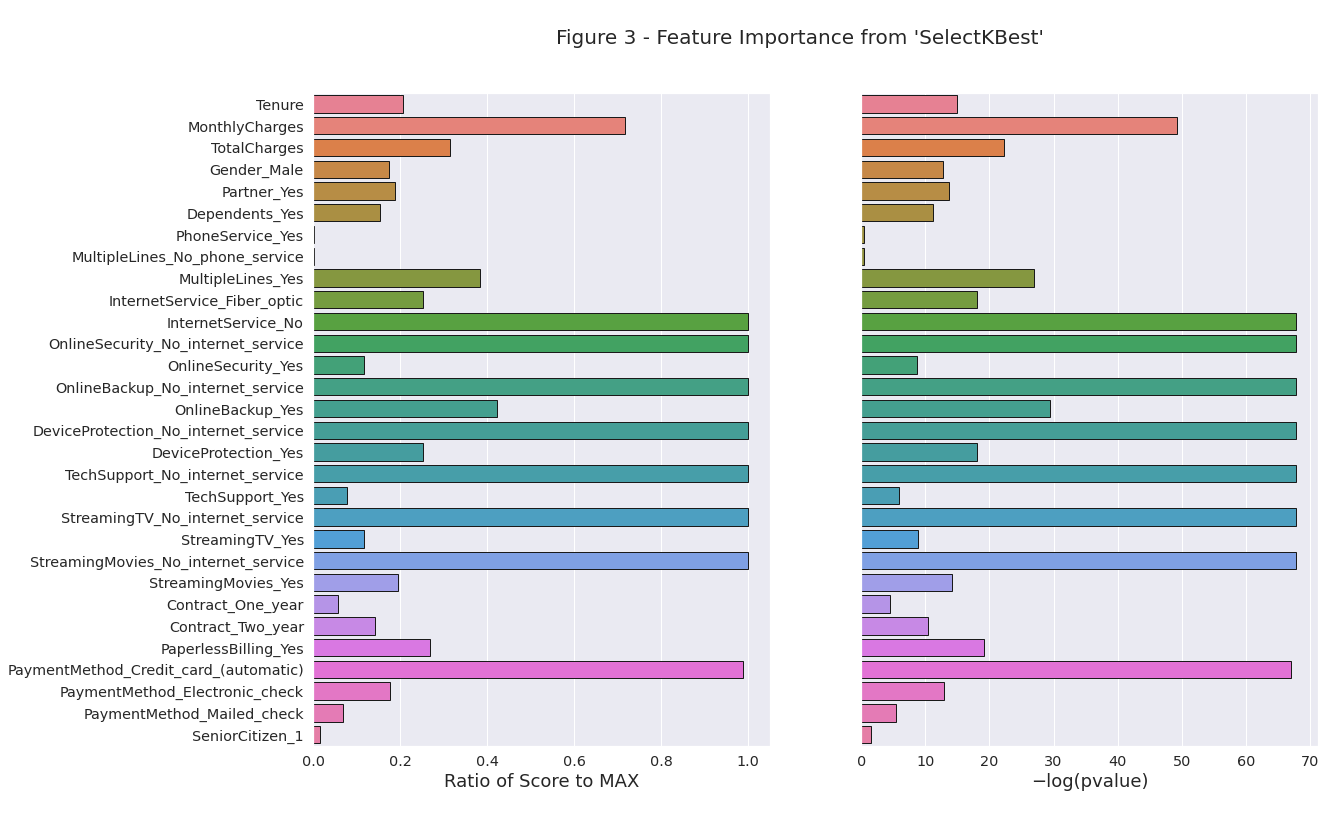

In [0]:
# Get Results
scores = k_best_select.scores_
scores_log_p = -np.log10(k_best_select.pvalues_)

# Get Ratios
scores /= scores.max()
scores_log_p /= scores.max()

plt.figure(figsize=(18,12))
plt.suptitle("""
Figure 3 - Feature Importance from 'SelectKBest'
""", fontsize=20)

plt.subplot(1, 2, 1)
sns.barplot(x=scores,
            y=explanatory_vars,
            palette='husl',
            edgecolor='k')
plt.xlabel('Ratio of Score to MAX\n', {'fontsize':18})
plt.tick_params(axis='both', labelsize='large')

plt.subplot(1, 2, 2, sharey=ax1)
sns.barplot(x=scores_log_p,
            y=explanatory_vars,
            palette='husl',
            edgecolor='k')
plt.xlabel("−log(pvalue)\n", {'fontsize':18})
plt.tick_params(axis='x', labelsize='large')
plt.yticks([])  # Disable yticks for second subplot

plt.show();

>The relative scores have been shown to reflect the essence of what `p-values` embody.
* Features with large _score ratios_ will be more useful for the learning models.
* Larger values for the $-log_{10}(p_{value})$ transformation indicate a more significant test result.
  * The largest `log-transformed p-value` corresponds to the lowest `p-value`.

>The most important features from `SelectKBest` that will explain the most variance are:
* `No Internet Service` (most descriptive)
* `Automatic Credit Card Payment Method`
* `Monthly Charges`
* `Online Backup`
* `Multiple Lines`
* `Total Charges`

### Instantiate Models

>To find the best parameter values, iterations of _cross-validation_ will be applied for each model.

>Given the binary classification problem of predicting the target `churn`, a _confusion matrix_ and _classification report_ will be generated to evaluate and compare each model's performance.

In [0]:
model_names = dict()
results = pd.DataFrame(data=None, columns=['Model', 'CV_Score'])

In [0]:
run_times_kbest = dict()
y_pred_kbest = dict()
cv_records_k = dict()

#### Logistic Regression

>Contrary to its name, `Logistic Regression` can be used as a classifier, where the target is a binary variable rather than a continuous estimated value.
* Input variables (i.e., features) are used with optimization algorithms to determine the best coefficients of a linear function that, when tuned properly, can predict the target's outcome for previously unseen data.
* As such, it can be considered as a generalized linear model.

In [0]:
t_start = time.clock()


## Input Parameters
param_grid = {
    # 'class_weight': ['balanced'],  # in lieu of resampling
    'penalty': ['l2'],  # regularization
    'solver': ['lbfgs', 'sag', 'saga'],
    'max_iter': [100, 1000, 10000],
}


## Instantiate classification model and perform Cross Validation
clf = GridSearchCV(estimator=LogisticRegression(),
                   param_grid=param_grid,
                   verbose=1,  # number of 'elapsed' statuses
                   cv=5)


## Run fit with all sets of parameters
clf.fit(X_train_transformed, y_train_upsampled)


## Make predictions here
y_pred = clf.predict(X_test_transformed)
y_pred_kbest['LR'] = y_pred


## Get Elapsed Time
t_end = time.clock()
run_times_kbest['LR'] = t_end - t_start

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    3.3s finished


In [0]:
print("Mean CV Score:")
print(clf.cv_results_['mean_test_score'])
print()
print()
print("Full Results for all CV Splits:")
clf.cv_results_

Mean CV Score:
[0.5536245 0.5536245 0.5536245 0.5536245 0.5536245 0.5536245 0.5536245
 0.5536245 0.5536245]


Full Results for all CV Splits:


{'mean_fit_time': array([0.03588886, 0.10058684, 0.06412396, 0.03635454, 0.10267768,
        0.06522093, 0.03840523, 0.10061321, 0.06408615]),
 'mean_score_time': array([0.0062078 , 0.00607438, 0.00558138, 0.00546994, 0.00562229,
        0.00552611, 0.00667319, 0.00549088, 0.00551915]),
 'mean_test_score': array([0.5536245, 0.5536245, 0.5536245, 0.5536245, 0.5536245, 0.5536245,
        0.5536245, 0.5536245, 0.5536245]),
 'param_max_iter': masked_array(data=[100, 100, 100, 1000, 1000, 1000, 10000, 10000, 10000],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['lbfgs', 'sag', 'saga', 'lbfgs', 'sag', 'sa

In [0]:
## Output Status and Model-Performance Results
model_names['LR'] = 'Logistic Regression (as Classifier)'
MI = 'LR'
FV = 'SelectKBest'

print(f"'{model_names[MI]}' Complete")
print("Predictions and run-time have been saved for model evaluation!")


print()
print('*'*70)
print()


## Print the best iteration from GridSearchCV
# Get mean cross-validated score of the best estimator (clf.best_score_).
# Get the best standard deviation across CV splits (std_test_score),
# not across parameter candidates (training).
mean_cv = clf.best_score_
std_cv = clf.cv_results_['std_test_score'][clf.best_index_]

print("Mean Cross Validation Score (95% confidence interval)")
print(f"{mean_cv :0.3f} (+/- {std_cv * 2 :0.3f})")
print()
print("Best parameter-set found after tuning:")
print(clf.best_params_)
print()
print("Best estimator:")
print(clf.best_estimator_)


## Update the Results DF with current model and variation
cv_records_k[MI] = clf.cv_results_['mean_test_score']

results = pd.concat(
    [results,
     pd.DataFrame(
         {'Model': [MI for i in range(len(cv_records_k[MI]))],
          'Feature_Variation': [FV for i in range(len(cv_records_k[MI]))],
          'CV_Score': cv_records_k[MI]})]
)


print()
print('*'*70)
print()


print("Prediction Results".upper())
print()
print('---- confusion matrix ----'.upper())
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print()
print('---- detailed classification report ----'.upper())
print(classification_report(y_true=y_test, y_pred=y_pred))


## Display Optional Output for each parameter set
# print()
# print('-'*55)
# print()
# print("Mean cross validation score for each parameter-set:")
# for mean, std, params in zip(clf.cv_results_['mean_test_score'],
#                              clf.cv_results_['std_test_score'],
#                              clf.cv_results_['params']):
#   print(f"{mean :0.3f} (+/- {std*2 :0.3f}) for {params :r}")

'Logistic Regression (as Classifier)' Complete
Predictions and run-time have been saved for model evaluation!

**********************************************************************

Mean Cross Validation Score (95% confidence interval)
0.571 (+/- 0.202)

Best parameter-set found after tuning:
{'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Best estimator:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**********************************************************************

PREDICTION RESULTS

---- CONFUSION MATRIX ----
[[417 605]
 [ 90 295]]

---- DETAILED CLASSIFICATION REPORT ----
              precision    recall  f1-score   support

          No       0.82      0.41      0.55      1022
         Yes  

#### Analysis

>Multivariate analysis across all models will occur during the _Results and Model Evaluation_ phase.
* For now, each model will be analyzed individually.

>The overall performance for this `Logistic Regression` model was not ideal, but it was fairly consistent between the _learning_ and _testing_ phases.
* The best parameter-set had a _mean cross validation score_ of $0.571\ (\pm\ 0.202)$, but this accuracy dropped to $0.51$ when the model was tested on previously unseen data.

>Despite the poor accuracy scores, it was able to predict $77$% of the customers who `churned`.
* This is shown by the calculated _recall_ for `Yes`, the _minority_ class. Inversely, the _precision_ was calculated as $33$%.
* The precision for predicting customers who `stayed` was $82$%, with a recall of $41$%.
* These results indicate that customers who `stayed` were identified more efficiently, yet less often, than those who `churned`.

>**Important Observations**
* Overall, this model performed poorly on the training data (underfitted), and predicted with slightly worse accuracy on the testing data.
* However, this model was able to successfully predict a considerable amount ($77$%) of the customers who would `churn`.

#### K Nearest Neighbors (KNN)

>For the `KNN Classifier`, a prediction will take the form of the most prevalent label within close proximity.
* Thus, rather than adding weights to the categories themselves, the _distances_ will be weighted; labels that are closer to the observation in question will have more influence on the predicted `target` value.

In [0]:
t_start = time.clock()


## Input Parameters
param_grid = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': list(range(3, 16, 2)),  # avoid ties via odd numbers
    'algorithm': ['auto'],
    'p': [1, 2],
}


## Instantiate classification model and perform Cross Validation
clf = GridSearchCV(estimator=KNeighborsClassifier(),
                   param_grid=param_grid,
                   verbose=1,  # number of 'elapsed' statuses
                   cv=5)


## Run fit with all sets of parameters
clf.fit(X_train_transformed, y_train_upsampled)


## Make predictions here
y_pred = clf.predict(X_test_transformed)
y_pred_kbest['KNN'] = y_pred


## Get Elapsed Time
t_end = time.clock()
run_times_kbest['KNN'] = t_end - t_start

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   32.0s finished


In [0]:
## Output Status and Model-Performance Results
model_names['KNN'] = 'K-Nearest Neighbors Classifier'
MI = 'KNN'
FV = 'SelectKBest'

print(f"'{model_names[MI]}' Complete")
print("Predictions and run-time have been saved for model evaluation!")


print()
print('*'*70)
print()


## Print the best iteration from GridSearchCV
# Get mean cross-validated score of the best estimator (clf.best_score_).
# Get the best standard deviation across CV splits (std_test_score),
# not across parameter candidates (training).
mean_cv = clf.best_score_
std_cv = clf.cv_results_['std_test_score'][clf.best_index_]

print("Mean Cross Validation Score (95% confidence interval)")
print(f"{mean_cv :0.3f} (+/- {std_cv * 2 :0.3f})")
print()
print("Best parameter-set found after tuning:")
print(clf.best_params_)
print()
print("Best estimator:")
print(clf.best_estimator_)


## Update the Results DF with current model and variation
cv_records_k[MI] = clf.cv_results_['mean_test_score']

results = pd.concat(
    [results,
     pd.DataFrame(
         {'Model': [MI for i in range(len(cv_records_k[MI]))],
          'Feature_Variation': [FV for i in range(len(cv_records_k[MI]))],
          'CV_Score': cv_records_k[MI]})]
)


print()
print('*'*70)
print()


print("Prediction Results".upper())
print()
print('---- confusion matrix ----'.upper())
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print()
print('---- detailed classification report ----'.upper())
print(classification_report(y_true=y_test, y_pred=y_pred))


## Display Optional Output for each parameter set
# print()
# print('-'*55)
# print()
# print("Mean cross validation score for each parameter-set:")
# for mean, std, params in zip(clf.cv_results_['mean_test_score'],
#                              clf.cv_results_['std_test_score'],
#                              clf.cv_results_['params']):
#   print(f"{mean :0.3f} (+/- {std*2 :0.3f}) for {params :r}")

'K-Nearest Neighbors Classifier' Complete
Predictions and run-time have been saved for model evaluation!

**********************************************************************

Mean Cross Validation Score (95% confidence interval)
0.709 (+/- 0.251)

Best parameter-set found after tuning:
{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='distance')

**********************************************************************

PREDICTION RESULTS

---- CONFUSION MATRIX ----
[[660 362]
 [252 133]]

---- DETAILED CLASSIFICATION REPORT ----
              precision    recall  f1-score   support

          No       0.72      0.65      0.68      1022
         Yes       0.27      0.35      0.30       385

    accuracy                           0.56      1407
   macro avg       0.50      0.

#### Analysis

>The overall performance for this `K-Nearest Neighbors Classifier` was not ideal.
* For the training data, the best parameter-set had a _mean cross validation score_ of $0.709\ (\pm\ 0.251)$.
* This accuracy dropped to $0.56$ when the model was tested on previously unseen data.
* It was noticeably inconsistent between the _learning_ and _testing_ phases ($15$% difference in accuracy).

>It predicted $35$% of the customers who `churned`, with $27$% precision.
* It predicted $65$% of those who `stayed`, with $72$% precision.
* These results indicate that the customers who `stayed` were identified both more often (recall) and more efficiently (precision) than those who `churned`.

>**Important Observations**
* Overall, this model was able to predict a noticeable amount of customers who `stayed`, but was considerably worse at identifying `churning` customers.
* It successfully predicted only $35$% of the customers who would `churn`.

#### Decision Tree

In [0]:
t_start = time.clock()


## Input Parameters
param_grid = {
    # 'class_weight': ['balanced'],  # in lieu of resampling
    'criterion': ['entropy', 'gini'],
    'max_depth': list(range(2,31)),
}


## Instantiate classification model and perform Cross Validation
# The 'scoring' default is None, so the estimator’s score-method is used.
clf = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=param_grid,
                  #  n_jobs=-1,  # number of jobs to run in parallel
                   verbose=1,  # number of 'elapsed' statuses
                   cv=5)


## Run fit with all sets of parameters
clf.fit(X_train_transformed, y_train_upsampled)


## Make predictions here
y_pred = clf.predict(X_test_transformed)
y_pred_kbest['DT'] = y_pred


## Get Elapsed Time
t_end = time.clock()
run_times_kbest['DT'] = t_end - t_start

Fitting 5 folds for each of 58 candidates, totalling 290 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 290 out of 290 | elapsed:   13.3s finished


In [0]:
## Output Status and Model-Performance Results
model_names['DT'] = 'Decision Tree Classifier'
MI = 'DT'
FV = 'SelectKBest'

print(f"'{model_names[MI]}' Complete")
print("Predictions and run-time have been saved for model evaluation!")


print()
print('*'*70)
print()


## Print the best iteration from GridSearchCV
# Get mean cross-validated score of the best estimator (clf.best_score_).
# Get the best standard deviation across CV splits (std_test_score),
# not across parameter candidates (training).
mean_cv = clf.best_score_
std_cv = clf.cv_results_['std_test_score'][clf.best_index_]

print("Mean Cross Validation Score (95% confidence interval)")
print(f"{mean_cv :0.3f} (+/- {std_cv * 2 :0.3f})")
print()
print("Best parameter-set found after tuning:")
print(clf.best_params_)
print()
print("Best estimator:")
print(clf.best_estimator_)


## Update the Results DF with current model and variation
cv_records_k[MI] = clf.cv_results_['mean_test_score']

results = pd.concat(
    [results,
     pd.DataFrame(
         {'Model': [MI for i in range(len(cv_records_k[MI]))],
          'Feature_Variation': [FV for i in range(len(cv_records_k[MI]))],
          'CV_Score': cv_records_k[MI]})]
)


print()
print('*'*70)
print()


print("Prediction Results".upper())
print()
print('---- confusion matrix ----'.upper())
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print()
print('---- detailed classification report ----'.upper())
print(classification_report(y_true=y_test, y_pred=y_pred))


## Display Optional Output for each parameter set
# print()
# print('-'*55)
# print()
# print("Mean cross validation score for each parameter-set:")
# for mean, std, params in zip(clf.cv_results_['mean_test_score'],
#                              clf.cv_results_['std_test_score'],
#                              clf.cv_results_['params']):
#   print(f"{mean :0.3f} (+/- {std*2 :0.3f}) for {params :r}")

'Decision Tree Classifier' Complete
Predictions and run-time have been saved for model evaluation!

**********************************************************************

Mean Cross Validation Score (95% confidence interval)
0.840 (+/- 0.117)

Best parameter-set found after tuning:
{'criterion': 'gini', 'max_depth': 30}

Best estimator:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**********************************************************************

PREDICTION RESULTS

---- CONFUSION MATRIX ----
[[751 271]
 [287  98]]

---- DETAILED CLASSIFICATION REPORT ----
              precision    recall  f1-score   supp

#### Analysis

>The overall performance for this `Decision Tree Classifier` was not ideal.
* For the training data, the best parameter-set had a _mean cross validation score_ of $0.840\ (\pm\ 0.117)$.
* This accuracy dropped to $0.60$ when the model was tested on previously unseen data.
* This $24$% difference in accuracy indicates that the model could be overfitted.

>It predicted $25$% of the customers who `churned`, with $27$% precision.
* It predicted $73$% of those who `stayed`, with $72$% precision.
* These results indicate that customers who `stayed` were identified both more often (recall) and more efficiently (precision) than those who `churned`.

>**Important Observations**
* Overall, this model was able to predict a noticeable amount of customers who `stayed`, but was considerably worse at identifying `churning` customers.
* It successfully predicted only $25$% of the customers who would `churn`.

#### Random Forest

In [0]:
t_start = time.clock()


## Input Parameters
# NOTE: RF (SelectKBest) run time: t < 26 minutes for 780 fits.
param_grid = {
    # 'class_weight': ['balanced'],  # in lieu of resampling
    'criterion': ['entropy', 'gini'],
    'max_depth': list(range(2,15)),
    'n_estimators': [50, 100, 200, 300, 500, 1000],
}


## Instantiate classification model and perform Cross Validation
clf = GridSearchCV(estimator=RandomForestClassifier(),
                   param_grid=param_grid,
                  #  n_jobs=-1,  # number of jobs to run in parallel
                   verbose=1,  # number of 'elapsed' statuses
                   cv=5)


## Build a forest of trees from the training set
clf.fit(X_train_transformed, y_train_upsampled)


## Make predictions here
y_pred = clf.predict(X_test_transformed)
y_pred_kbest['RF'] = y_pred


## Get Elapsed Time
t_end = time.clock()
run_times_kbest['RF'] = t_end - t_start

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 156 candidates, totalling 780 fits


[Parallel(n_jobs=1)]: Done 780 out of 780 | elapsed: 25.4min finished


In [0]:
## Output Status and Model-Performance Results
model_names['RF'] = 'Random Forest Classifier'
MI = 'RF'
FV = 'SelectKBest'

print(f"'{model_names[MI]}' Complete")
print("Predictions and run-time have been saved for model evaluation!")


print()
print('*'*70)
print()


## Print the best iteration from GridSearchCV
# Get mean cross-validated score of the best estimator (clf.best_score_).
# Get the best standard deviation across CV splits (std_test_score),
# not across parameter candidates (training).
mean_cv = clf.best_score_
std_cv = clf.cv_results_['std_test_score'][clf.best_index_]

print("Mean Cross Validation Score (95% confidence interval)")
print(f"{mean_cv :0.3f} (+/- {std_cv * 2 :0.3f})")
print()
print("Best parameter-set found after tuning:")
print(clf.best_params_)
print()
print("Best estimator:")
print(clf.best_estimator_)


## Update the Results DF with current model and variation
cv_records_k[MI] = clf.cv_results_['mean_test_score']

results = pd.concat(
    [results,
     pd.DataFrame(
         {'Model': [MI for i in range(len(cv_records_k[MI]))],
          'Feature_Variation': [FV for i in range(len(cv_records_k[MI]))],
          'CV_Score': cv_records_k[MI]})]
)


print()
print('*'*70)
print()


print("Prediction Results".upper())
print()
print('---- confusion matrix ----'.upper())
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print()
print('---- detailed classification report ----'.upper())
print(classification_report(y_true=y_test, y_pred=y_pred))


## Display Optional Output for each parameter set
# print()
# print('-'*55)
# print()
# print("Mean cross validation score for each parameter-set:")
# for mean, std, params in zip(clf.cv_results_['mean_test_score'],
#                              clf.cv_results_['std_test_score'],
#                              clf.cv_results_['params']):
#   print(f"{mean :0.3f} (+/- {std*2 :0.3f}) for {params :r}")

'Random Forest Classifier' Complete
Predictions and run-time have been saved for model evaluation!

**********************************************************************

Mean Cross Validation Score (95% confidence interval)
0.847 (+/- 0.095)

Best parameter-set found after tuning:
{'criterion': 'gini', 'max_depth': 14, 'n_estimators': 1000}

Best estimator:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**********************************************************************

PREDICTION RESULTS


#### Analysis

>The overall performance for this `Random Forest Classifier` was not ideal.
* For the training data, the best parameter-set had a _mean cross validation score_ of $0.847\ (\pm\ 0.095)$.
* This accuracy dropped to $0.68$ when the model was tested on previously unseen data.
* It was noticeably inconsistent between the _learning_ and _testing_ phases ($17$% difference in accuracy).

>It predicted $26$% of the customers who `churned`, with $37$% precision.
* It predicted $83$% of those who `stayed`, with $75$% precision.
* These results indicate that customers who `stayed` were identified both more often (recall) and more efficiently (precision) than those who `churned`.

>**Important Observations**
* Overall, this model was able to predict a noticeable amount of customers who `stayed`, but was considerably worse at identifying `churning` customers.
* It successfully predicted only $26$% of the customers who would `churn`.

#### Support Vector Machines (SVM)

In [0]:
t_start = time.clock()


## Input Parameters
# NOTE: SVM (SelectKBest) run time: t < 57 minutes for 150 fits.

C_values = [10.0 ** i for i in range(3)]  # starts at 1.0
param_linear = {
    # 'class_weight': ['balanced'],  # in lieu of resampling
    'C': C_values,
    'kernel': ['linear'],
}

gamma_values = [i/10 for i in range(1, 10)]  # starts at 0.1
param_rbf = {
    # 'class_weight': ['balanced'],  # in lieu of resampling
    'C': C_values,
    'kernel': ['rbf'],
    'gamma': gamma_values,
}

param_grid = [param_linear, param_rbf]


## Instantiate classification model and perform Cross Validation
clf = GridSearchCV(estimator=SVC(),
                   param_grid=param_grid,
                  #  n_jobs=-1,  # number of jobs to run in parallel
                   verbose=1,  # number of 'elapsed' statuses
                   cv=5)


## Run fit with all sets of parameters
clf.fit(X_train_transformed, y_train_upsampled)


## Make predictions here
y_pred = clf.predict(X_test_transformed)
y_pred_kbest['SVM'] = y_pred


## Get Elapsed Time
t_end = time.clock()
run_times_kbest['SVM'] = t_end - t_start

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 55.4min finished


In [0]:
## Output Status and Model-Performance Results
model_names['SVM'] = 'Support Vector Machines Classifier'
MI = 'SVM'
FV = 'SelectKBest'

print(f"'{model_names[MI]}' Complete")
print("Predictions and run-time have been saved for model evaluation!")


print()
print('*'*70)
print()


## Print the best iteration from GridSearchCV
# Get mean cross-validated score of the best estimator (clf.best_score_).
# Get the best standard deviation across CV splits (std_test_score),
# not across parameter candidates (training).
mean_cv = clf.best_score_
std_cv = clf.cv_results_['std_test_score'][clf.best_index_]

print("Mean Cross Validation Score (95% confidence interval)")
print(f"{mean_cv :0.3f} (+/- {std_cv * 2 :0.3f})")
print()
print("Best parameter-set found after tuning:")
print(clf.best_params_)
print()
print("Best estimator:")
print(clf.best_estimator_)


## Update the Results DF with current model and variation
cv_records_k[MI] = clf.cv_results_['mean_test_score']

results = pd.concat(
    [results,
     pd.DataFrame(
         {'Model': [MI for i in range(len(cv_records_k[MI]))],
          'Feature_Variation': [FV for i in range(len(cv_records_k[MI]))],
          'CV_Score': cv_records_k[MI]})]
)


print()
print('*'*70)
print()


print("Prediction Results".upper())
print()
print('---- confusion matrix ----'.upper())
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print()
print('---- detailed classification report ----'.upper())
print(classification_report(y_true=y_test, y_pred=y_pred))


## Display Optional Output for each parameter set
# print()
# print('-'*55)
# print()
# print("Mean cross validation score for each parameter-set:")
# for mean, std, params in zip(clf.cv_results_['mean_test_score'],
#                              clf.cv_results_['std_test_score'],
#                              clf.cv_results_['params']):
#   print(f"{mean :0.3f} (+/- {std*2 :0.3f}) for {params :r}")

'Support Vector Machines Classifier' Complete
Predictions and run-time have been saved for model evaluation!

**********************************************************************

Mean Cross Validation Score (95% confidence interval)
0.747 (+/- 0.332)

Best parameter-set found after tuning:
{'C': 100.0, 'gamma': 0.9, 'kernel': 'rbf'}

Best estimator:
SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.9, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**********************************************************************

PREDICTION RESULTS

---- CONFUSION MATRIX ----
[[853 169]
 [311  74]]

---- DETAILED CLASSIFICATION REPORT ----
              precision    recall  f1-score   support

          No       0.73      0.83      0.78      1022
         Yes       0.30      0.19      0.24       385

    accuracy                           0.66     

#### Analysis

>The overall performance for this `Support Vector Machines Classifier` was not ideal.
* For the training data, the best parameter-set had a _mean cross validation score_ of $0.747\ (\pm\ 0.332)$.
* This accuracy dropped to $0.66$ when the model was tested on previously unseen data.
* Its performances between the _learning_ and _testing_ phases were within a $9$% difference in accuracy.

>It predicted $19$% of the customers who `churned`, with $30$% precision.
* It predicted $83$% of those who `stayed`, with $73$% precision.
* These results indicate that customers who `stayed` were identified both more often (recall) and more efficiently (precision) than those who `churned`.

>**Important Observations**
* Overall, this model was able to predict a noticeable amount of customers who `stayed`, but was considerably worse at identifying `churning` customers.
* It successfully predicted only $19$% of the customers who would `churn`.

#### Gradient Boosted Model

>Rather than using individual Decision Trees or Random Forests, the sixth model to be explored will be a Gradient Boosted model of Decision Trees.

>This approach will use multiple trees, similar to a Random Forest model, but in a sequential manner.
* With Gradient Boosting, the output of one tree becomes the input to the next tree.
* Each new tree tries to fix the mistakes of its predecessor by placing more focus on incorrectly predicted values and acting on discovered improvements.

In [0]:
t_start = time.clock()


## Input Parameters
# NOTES: GB (SelectKBest) run time: t < 41 minutes for 480 fits.
  # For better performing computers, the 'mae' criterion can be included.
param_grid = {
    'criterion': ['friedman_mse'],
    'learning_rate': [0.05, 0.1],
    'loss': ['deviance', 'exponential'],
    'max_depth': list(range(2,6)),
    'min_samples_split': [2],
    'n_estimators': [50, 100, 250, 500, 750, 1000],
    'subsample' : [1.0],
}


## Instantiate classification model and perform Cross Validation
clf = GridSearchCV(estimator=GradientBoostingClassifier(),
                   param_grid=param_grid,
                  #  n_jobs=-1,  # number of jobs to run in parallel
                   verbose=1,  # number of 'elapsed' statuses
                   cv=5)


## Fit the gradient boosting model
clf.fit(X_train_transformed, y_train_upsampled)


## Make predictions here
y_pred = clf.predict(X_test_transformed)
y_pred_kbest['GB'] = y_pred


## Get Elapsed Time
t_end = time.clock()
run_times_kbest['GB'] = t_end - t_start

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 38.8min finished


In [0]:
## Output Status and Model-Performance Results
model_names['GB'] = 'Gradient Boosting Classifier'
MI = 'GB'
FV = 'SelectKBest'

print(f"'{model_names[MI]}' Complete")
print("Predictions and run-time have been saved for model evaluation!")


print()
print('*'*70)
print()


## Print the best iteration from GridSearchCV
# Get mean cross-validated score of the best estimator (clf.best_score_).
# Get the best standard deviation across CV splits (std_test_score),
# not across parameter candidates (training).
mean_cv = clf.best_score_
std_cv = clf.cv_results_['std_test_score'][clf.best_index_]

print("Mean Cross Validation Score (95% confidence interval)")
print(f"{mean_cv :0.3f} (+/- {std_cv * 2 :0.3f})")
print()
print("Best parameter-set found after tuning:")
print(clf.best_params_)
print()
print("Best estimator:")
print(clf.best_estimator_)


## Update the Results DF with current model and variation
cv_records_k[MI] = clf.cv_results_['mean_test_score']

results = pd.concat(
    [results,
     pd.DataFrame(
         {'Model': [MI for i in range(len(cv_records_k[MI]))],
          'Feature_Variation': [FV for i in range(len(cv_records_k[MI]))],
          'CV_Score': cv_records_k[MI]})]
)


print()
print('*'*70)
print()


print("Prediction Results".upper())
print()
print('---- confusion matrix ----'.upper())
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print()
print('---- detailed classification report ----'.upper())
print(classification_report(y_true=y_test, y_pred=y_pred))


## Display Optional Output for each parameter set
# print()
# print('-'*55)
# print()
# print("Mean cross validation score for each parameter-set:")
# for mean, std, params in zip(clf.cv_results_['mean_test_score'],
#                              clf.cv_results_['std_test_score'],
#                              clf.cv_results_['params']):
#   print(f"{mean :0.3f} (+/- {std*2 :0.3f}) for {params :r}")

'Gradient Boosting Classifier' Complete
Predictions and run-time have been saved for model evaluation!

**********************************************************************

Mean Cross Validation Score (95% confidence interval)
0.852 (+/- 0.099)

Best parameter-set found after tuning:
{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 1000, 'subsample': 1.0}

Best estimator:
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                          

#### Analysis

>The overall performance for this `Gradient Boosting Classifier` was not ideal.
* For the training data, the best parameter-set had a _mean cross validation score_ of $0.852\ (\pm\ 0.099)$.
* This accuracy dropped to $0.65$ when the model was tested on previously unseen data.
* It was noticeably inconsistent between the _learning_ and _testing_ phases ($20$% difference in accuracy).

>It predicted $21$% of the customers who `churned`, with $30$% precision.
* It predicted $81$% of those who `stayed`, with $73$% precision.
* These results indicate that customers who `stayed` were identified both more often (recall) and more efficiently (precision) than those who `churned`.

>**Important Observations**
* Overall, this model was able to predict a noticeable amount of customers who `stayed`, but was considerably worse at identifying `churning` customers.
* It successfully predicted only $21$% of the customers who would `churn`.

## 4) Modeling: Part 2

### Feature Selection using `PCA`

>Principal Components Analysis (PCA) projects collinear data from applicable features onto a new, shared axis; thus, PCA is a good approach for achieving dimensionality reduction while maintaining or improving explanatory power.

In [0]:
## Apply PCA, fit the model, update training set with new components
components = 10
pca = PCA(n_components=components)
X_train_transformed = pca.fit_transform(X_train_upsampled)

# Apply the same dimensionality reduction on the testing set
X_test_transformed = pca.transform(X_test)


print("---- Before PCA ----")
print(f"X Shape, before split: {X.shape}")
print("X Shapes after split:")
print(f">>> X_train: {X_train.shape}")
print(f">>> X_test: {X_test.shape}")
print()
print("X Shapes after upsampling:")
print(f">>> X_train: {X_train_upsampled.shape}")
print(f">>> X_test: {X_test.shape}")
print()
print(f"---- After PCA (components = {components}) ----")
print("Confirm New (transformed) Shapes:")
print(f">>> X_train_transformed: {X_train_transformed.shape}")
print(f">>> X_test_transformed: {X_test_transformed.shape}")

print()
print('-'*70)
print()

print('''Finding Collinearity among Features

The percentage % of "total variance in the dataset" captured
and explained by each principal component:
''')
print(pca.explained_variance_ratio_ * 100)
print()
print(f"Total: {sum(pca.explained_variance_ratio_ * 100) :0.0f}%")

---- Before PCA ----
X Shape, before split: (7032, 30)
X Shapes after split:
>>> X_train: (5625, 30)
>>> X_test: (1407, 30)

X Shapes after upsampling:
>>> X_train: (8282, 30)
>>> X_test: (1407, 30)

---- After PCA (components = 10) ----
Confirm New (transformed) Shapes:
>>> X_train_transformed: (8282, 10)
>>> X_test_transformed: (1407, 10)

----------------------------------------------------------------------

Finding Collinearity among Features

The percentage % of "total variance in the dataset" captured
and explained by each principal component:

[39.36649679 11.13114163  7.72868565  5.03781444  4.08265487  3.69115619
  3.34892104  3.09432284  2.85020032  2.55426608]

Total: 83%


>Together, these 10 components explain nearly $83$% of the data.
* Thus, they can effectively replace the original 30 features.
* While there is a loss of nearly $17$% of underlying information, the patterns that have been captured should suffice for each of the models to predict an outcome.

---

#### What are the most descriptive features according to `PCA`?

In [0]:
## Get Results
pca_scores = pd.DataFrame(
    data=pca.components_,
    columns=explanatory_vars,
    index=['PC_'+str(i) for i in range(1, components+1)]
)

pca_scores

,Tenure,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No_phone_service,MultipleLines_Yes,InternetService_Fiber_optic,InternetService_No,OnlineSecurity_No_internet_service,OnlineSecurity_Yes,OnlineBackup_No_internet_service,OnlineBackup_Yes,DeviceProtection_No_internet_service,DeviceProtection_Yes,TechSupport_No_internet_service,TechSupport_Yes,StreamingTV_No_internet_service,StreamingTV_Yes,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_One_year,Contract_Two_year,PaperlessBilling_Yes,PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,SeniorCitizen_1
PC_1,-0.081559,-0.273658,-0.176024,0.042654,-0.072389,-0.013866,0.033475,-0.033475,-0.119794,-0.169142,0.307063,0.307063,-0.119746,0.307063,-0.150423,0.307063,-0.152067,0.307063,-0.123144,0.307063,-0.162452,0.307063,-0.166052,-0.020266,-0.002799,-0.141506,0.081734,-0.096344,0.066804,-0.070158
PC_2,0.432109,0.070547,0.366957,-0.018341,0.261795,0.207131,0.098149,-0.098149,0.166349,-0.060262,0.114659,0.114659,0.187763,0.114659,0.176359,0.114659,0.197637,0.114659,0.209830,0.114659,0.134268,0.114659,0.126336,0.079215,0.364289,-0.072442,0.183976,-0.223358,-0.048513,-0.074309
PC_3,0.032729,-0.233956,-0.072408,-0.032775,0.072461,0.126961,-0.478871,0.478871,-0.284524,-0.361424,-0.074651,-0.074651,0.202116,-0.074651,0.069262,-0.074651,0.033137,-0.074651,0.152834,-0.074651,-0.087104,-0.074651,-0.087023,0.065541,0.081365,-0.146086,0.022184,-0.203047,0.173132,-0.134405
PC_4,0.008413,-0.011380,-0.038189,-0.218137,0.310957,0.354519,0.069851,-0.069851,0.088079,0.006259,0.018705,0.018705,-0.043550,0.018705,-0.049575,0.018705,-0.070981,0.018705,-0.054669,0.018705,-0.028290,0.018705,-0.050223,0.084212,0.093172,0.052644,-0.693953,0.128649,0.418808,-0.024613
PC_5,0.153678,-0.037364,0.067735,-0.012773,0.124821,-0.053450,-0.401394,0.401394,0.071752,0.056278,0.097810,0.097810,-0.204631,0.097810,-0.080976,0.097810,0.070479,0.097810,-0.181018,0.097810,0.226051,0.097810,0.247472,-0.021929,0.060028,0.202592,-0.125644,0.354517,-0.297008,0.284540
PC_6,0.020553,0.038847,0.077733,0.087215,-0.060279,-0.046985,0.001412,-0.001412,-0.080208,-0.005178,0.046089,0.046089,0.035601,0.046089,0.085697,0.046089,0.107080,0.046089,0.017601,0.046089,0.134369,0.046089,0.139635,0.804092,-0.490693,0.030861,-0.038144,-0.033898,0.089512,-0.019824
PC_7,0.050990,0.056444,0.109762,-0.062002,-0.476251,-0.534275,-0.048119,0.048119,0.038318,-0.020195,0.046548,0.046548,0.012634,0.046548,0.049018,0.046548,0.133986,0.046548,0.198947,0.046548,0.167920,0.046548,0.179909,-0.130036,0.181754,0.000608,-0.291943,-0.130738,0.411375,0.047205
PC_8,0.078068,-0.044816,0.022562,-0.880073,-0.021400,-0.161524,-0.010755,0.010755,0.091517,0.010995,0.000616,0.000616,0.018408,0.000616,0.090464,0.000616,-0.098931,0.000616,-0.027515,0.000616,-0.157651,0.000616,-0.173447,0.131071,-0.057361,0.085460,0.162770,-0.080384,-0.079815,0.201189
PC_9,0.189585,-0.087425,0.090626,0.363451,0.126740,-0.210391,0.000004,-0.000004,0.176032,-0.042309,-0.020115,-0.020115,0.111200,-0.020115,0.235235,-0.020115,-0.130674,-0.020115,-0.079587,-0.020115,-0.325724,-0.020115,-0.310008,0.074183,-0.002364,-0.101922,-0.108307,-0.056702,0.066126,0.625812
PC_10,0.078694,-0.030607,0.035420,-0.082656,-0.135745,-0.145275,0.068045,-0.068045,-0.041935,-0.126266,0.004766,0.004766,0.311032,0.004766,0.048548,0.004766,-0.007585,0.004766,0.098711,0.004766,-0.070618,0.004766,-0.060106,0.084218,0.060375,-0.525135,-0.261924,0.526871,-0.365351,-0.185604


In [0]:
pca_scores = pca_scores.transpose()

pca_scores.sort_values(by='PC_1', ascending=False)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
DeviceProtection_No_internet_service,0.307063,0.114659,-0.074651,0.018705,0.097810,0.046089,0.046548,0.000616,-0.020115,0.004766
TechSupport_No_internet_service,0.307063,0.114659,-0.074651,0.018705,0.097810,0.046089,0.046548,0.000616,-0.020115,0.004766
InternetService_No,0.307063,0.114659,-0.074651,0.018705,0.097810,0.046089,0.046548,0.000616,-0.020115,0.004766
OnlineSecurity_No_internet_service,0.307063,0.114659,-0.074651,0.018705,0.097810,0.046089,0.046548,0.000616,-0.020115,0.004766
StreamingMovies_No_internet_service,0.307063,0.114659,-0.074651,0.018705,0.097810,0.046089,0.046548,0.000616,-0.020115,0.004766
OnlineBackup_No_internet_service,0.307063,0.114659,-0.074651,0.018705,0.097810,0.046089,0.046548,0.000616,-0.020115,0.004766
StreamingTV_No_internet_service,0.307063,0.114659,-0.074651,0.018705,0.097810,0.046089,0.046548,0.000616,-0.020115,0.004766
PaymentMethod_Credit_card_(automatic),0.081734,0.183976,0.022184,-0.693953,-0.125644,-0.038144,-0.291943,0.162770,-0.108307,-0.261924
PaymentMethod_Mailed_check,0.066804,-0.048513,0.173132,0.418808,-0.297008,0.089512,0.411375,-0.079815,0.066126,-0.365351
Gender_Male,0.042654,-0.018341,-0.032775,-0.218137,-0.012773,0.087215,-0.062002,-0.880073,0.363451,-0.082656


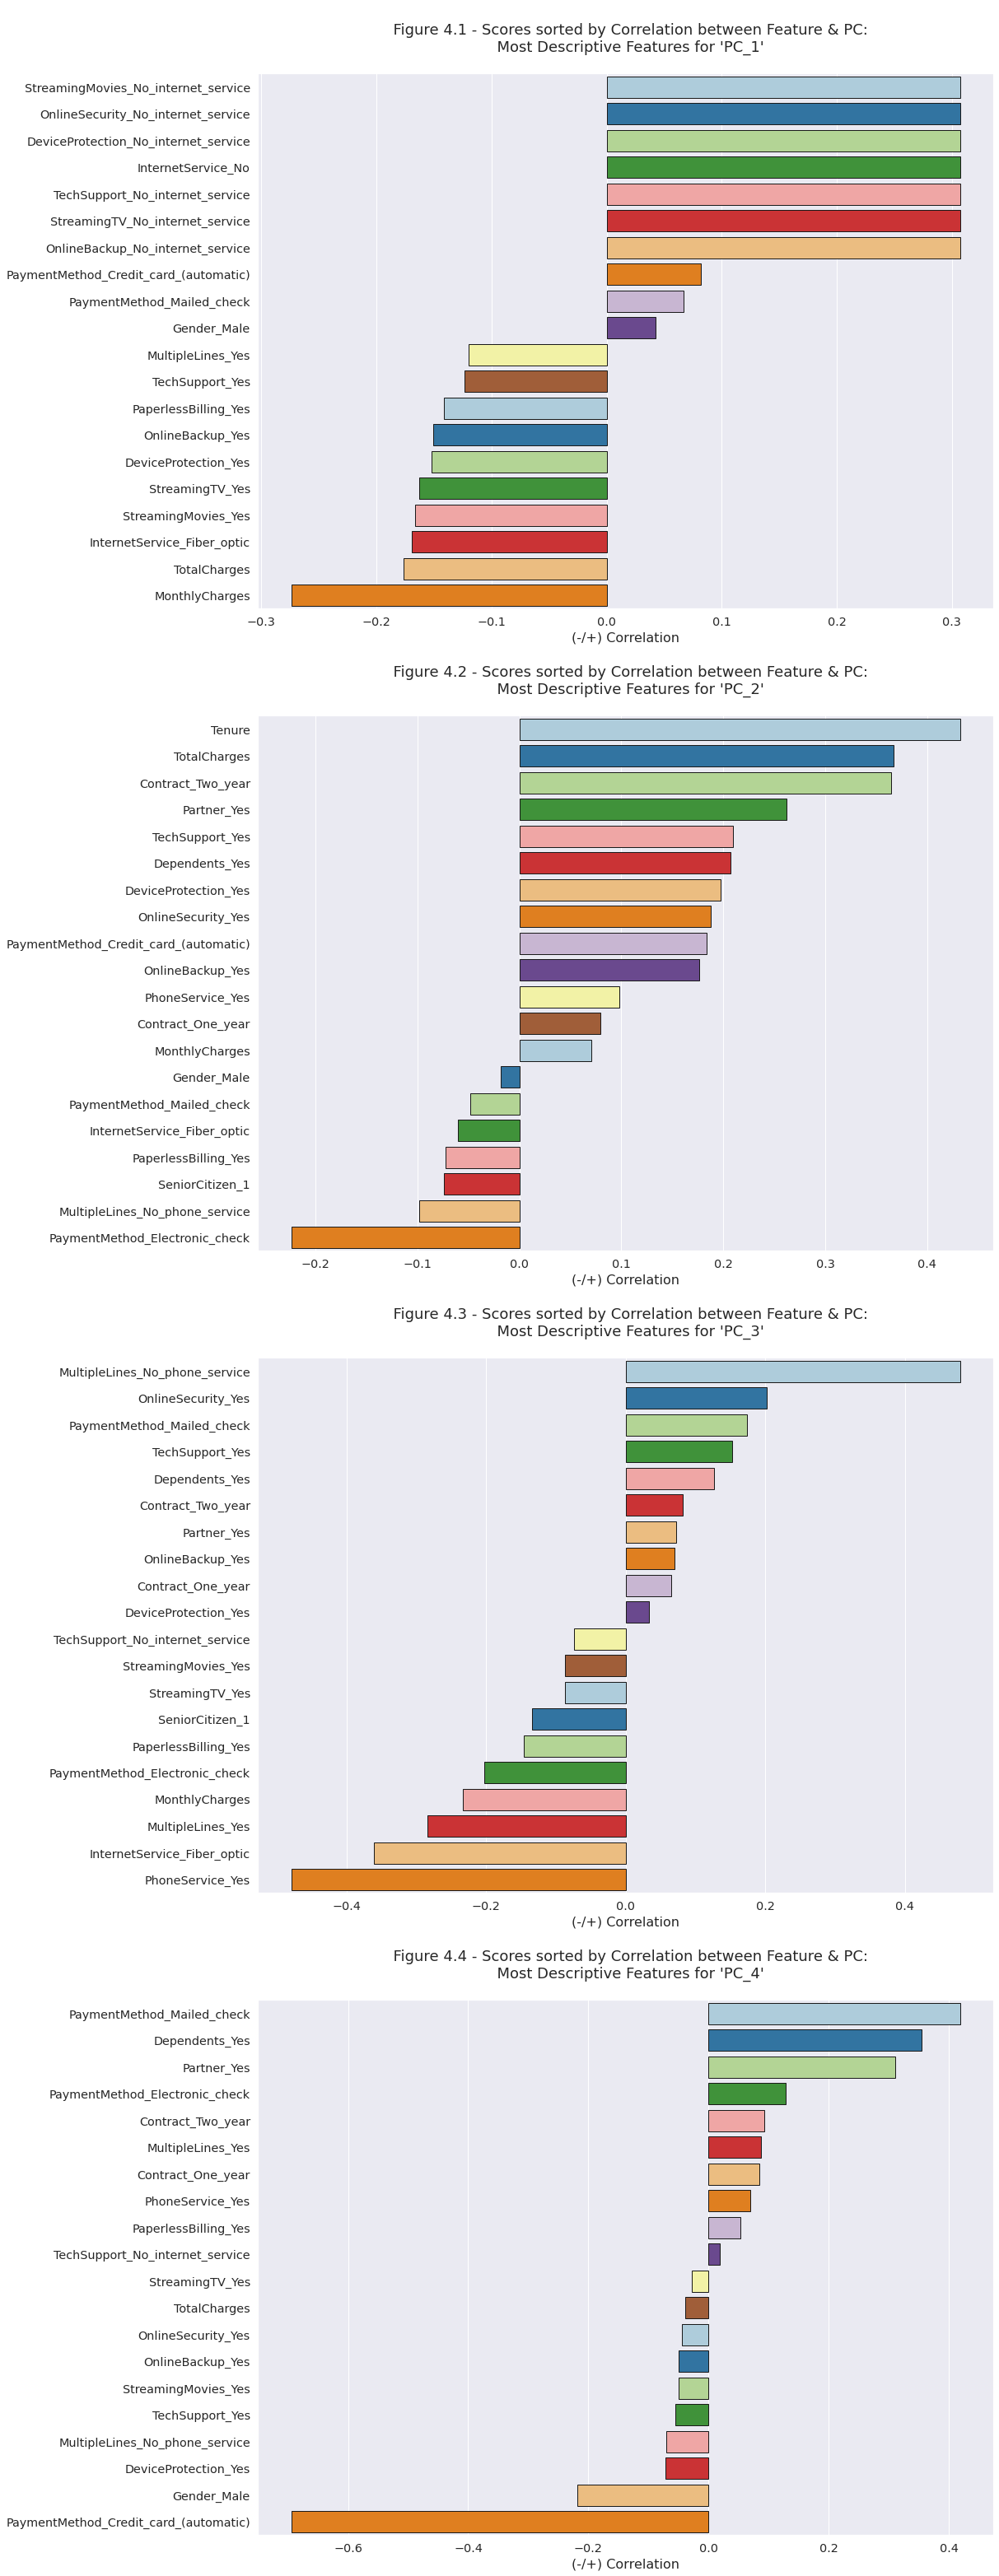

In [0]:
## Plot from PC_1 up to PC_N, sorted by scores (feature & PC correlations)
k_vars = 20
PC_N = 4
PC_columns = list(pca_scores.columns)[:PC_N]

plt.figure(figsize=(16,55))

for i, PC in enumerate(PC_columns, 1):
  old_k = k_vars
  if k_vars > pca_scores.shape[0]:
    k_vars = pca_scores.shape[0] // 2
  elif k_vars <= 1:
    k_vars = 1
  else:
    k_vars //= 2
  # Get top (+ correlated) & bottom (- correlated) k features
  s = pca_scores[PC].sort_values(ascending=False)
  best_features = list(s.index)[:k_vars] + list(s.index)[-k_vars:]
  best_values = list(s.values)[:k_vars] + list(s.values)[-k_vars:]
  t = f"""
  Figure 4.{i} - Scores sorted by Correlation between Feature & PC:
  Most Descriptive Features for '{PC}'
  """
  # Plot
  plt.subplot(len(PC_columns), 1, i)
  sns.barplot(x=best_values,
              y=best_features,
              palette='Paired',
              edgecolor='k')
  plt.xlabel("(-/+) Correlation", {'fontsize':16})
  plt.tick_params(axis='both', labelsize='large')
  plt.title(t, {'fontsize':18})
  k_vars = old_k

plt.show();

>The first four `principal components (PCs)` explain roughly $63$% of the observed variance.
* Note that less than half of the ten `PCs` can explain over half of the total variance.

>The top ranked features have been shown for the top four `PCs`.
* A highly positive or highly negative correlation indicates a relatively high importance between a feature and the given `PC`.

>The most important features from these `PCs` that explain the most variance are:
* `No Internet Service`
* `Monthly Charges`
* `Tenure`
* `Total Charges`
* `Two Year Contract`
* `Phone Service`
* `Fiber Optic Internet Service`
* `Mailed Check Payment Method`
* `Dependents`
* `Automatic Credit Card Payment Method`

### Instantiate Models

In [0]:
run_times_pca = dict()
y_pred_pca = dict()
cv_records_p = dict()

#### Logistic Regression

In [0]:
t_start = time.clock()


## Input Parameters
param_grid = {
    # 'class_weight': ['balanced'],  # in lieu of resampling
    'penalty': ['l2'],  # regularization
    'solver': ['lbfgs', 'sag', 'saga'],
    'max_iter': [100, 1000, 10000],
}


## Instantiate classification model and perform Cross Validation
clf = GridSearchCV(estimator=LogisticRegression(),
                   param_grid=param_grid,
                  #  n_jobs=-1,  # number of jobs to run in parallel
                   verbose=1,  # number of 'elapsed' statuses
                   cv=5)


## Run fit with all sets of parameters
clf.fit(X_train_transformed, y_train_upsampled)


## Make predictions here
y_pred = clf.predict(X_test_transformed)
y_pred_pca['LR'] = y_pred


## Get Elapsed Time
t_end = time.clock()
run_times_pca['LR'] = t_end - t_start

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    3.2s finished


In [0]:
## Output Status and Model-Performance Results
MI = 'LR'
FV = 'PCA'

print(f"'{model_names[MI]}' Complete")
print("Predictions and run-time have been saved for model evaluation!")


print()
print('*'*70)
print()


## Print the best iteration from GridSearchCV
# Get mean cross-validated score of the best estimator (clf.best_score_).
# Get the best standard deviation across CV splits (std_test_score),
# not across parameter candidates (training).
mean_cv = clf.best_score_
std_cv = clf.cv_results_['std_test_score'][clf.best_index_]

print("Mean Cross Validation Score (95% confidence interval)")
print(f"{mean_cv :0.3f} (+/- {std_cv * 2 :0.3f})")
print()
print("Best parameter-set found after tuning:")
print(clf.best_params_)
print()
print("Best estimator:")
print(clf.best_estimator_)


## Update the Results DF with current model and variation
cv_records_p[MI] = clf.cv_results_['mean_test_score']

results = pd.concat(
    [results,
     pd.DataFrame(
         {'Model': [MI for i in range(len(cv_records_p[MI]))],
          'Feature_Variation': [FV for i in range(len(cv_records_p[MI]))],
          'CV_Score': cv_records_p[MI]})]
)


print()
print('*'*70)
print()


print("Prediction Results".upper())
print()
print('---- confusion matrix ----'.upper())
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print()
print('---- detailed classification report ----'.upper())
print(classification_report(y_true=y_test, y_pred=y_pred))


## Display Optional Output for each parameter set
# print()
# print('-'*55)
# print()
# print("Mean cross validation score for each parameter-set:")
# for mean, std, params in zip(clf.cv_results_['mean_test_score'],
#                              clf.cv_results_['std_test_score'],
#                              clf.cv_results_['params']):
#   print(f"{mean :0.3f} (+/- {std*2 :0.3f}) for {params :r}")

'Logistic Regression (as Classifier)' Complete
Predictions and run-time have been saved for model evaluation!

**********************************************************************

Mean Cross Validation Score (95% confidence interval)
0.554 (+/- 0.202)

Best parameter-set found after tuning:
{'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Best estimator:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**********************************************************************

PREDICTION RESULTS

---- CONFUSION MATRIX ----
[[408 614]
 [ 87 298]]

---- DETAILED CLASSIFICATION REPORT ----
              precision    recall  f1-score   support

          No       0.82      0.40      0.54      1022
         Yes  

#### Analysis

>The overall performance for this `Logistic Regression` model was not ideal, but it was fairly consistent between the _learning_ and _testing_ phases.
* For the training data, the best parameter-set had a _mean cross validation score_ of $0.554\ (\pm\ 0.202)$.
* This accuracy dropped to $0.50$ when the model was tested on previously unseen data.
* The difference in accuracy between the _learning_ and _testing_ phases was approximately $5$%.

>It predicted $77$% of the customers who `churned`, with $33$% precision.
* It predicted $40$% of those who `stayed`, with $82$% precision.
* These results indicate that customers who `stayed` were identified more efficiently (precision), yet less often (recall), than those who `churned`.

>**Important Observations**
* Overall, this model performed poorly on the training data (underfitted), and predicted with slightly worse accuracy on the testing data.
* However, this model was able to successfully predict a considerable amount ($77$%) of the customers who would `churn`.

#### K Nearest Neighbors (KNN)

In [0]:
t_start = time.clock()


## Input Parameters
param_grid = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': list(range(3, 16, 2)),  # avoid ties via odd numbers
    'algorithm': ['auto'],
    'p': [1, 2],
}


## Instantiate classification model and perform Cross Validation
clf = GridSearchCV(estimator=KNeighborsClassifier(),
                   param_grid=param_grid,
                  #  n_jobs=-1,  # number of jobs to run in parallel
                   verbose=1,  # number of 'elapsed' statuses
                   cv=5)


## Run fit with all sets of parameters
clf.fit(X_train_transformed, y_train_upsampled)


## Make predictions here
y_pred = clf.predict(X_test_transformed)
y_pred_pca['KNN'] = y_pred


## Get Elapsed Time
t_end = time.clock()
run_times_pca['KNN'] = t_end - t_start

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   13.1s finished


In [0]:
## Output Status and Model-Performance Results
MI = 'KNN'
FV = 'PCA'

print(f"'{model_names[MI]}' Complete")
print("Predictions and run-time have been saved for model evaluation!")


print()
print('*'*70)
print()


## Print the best iteration from GridSearchCV
# Get mean cross-validated score of the best estimator (clf.best_score_).
# Get the best standard deviation across CV splits (std_test_score),
# not across parameter candidates (training).
mean_cv = clf.best_score_
std_cv = clf.cv_results_['std_test_score'][clf.best_index_]

print("Mean Cross Validation Score (95% confidence interval)")
print(f"{mean_cv :0.3f} (+/- {std_cv * 2 :0.3f})")
print()
print("Best parameter-set found after tuning:")
print(clf.best_params_)
print()
print("Best estimator:")
print(clf.best_estimator_)


## Update the Results DF with current model and variation
cv_records_p[MI] = clf.cv_results_['mean_test_score']

results = pd.concat(
    [results,
     pd.DataFrame(
         {'Model': [MI for i in range(len(cv_records_p[MI]))],
          'Feature_Variation': [FV for i in range(len(cv_records_p[MI]))],
          'CV_Score': cv_records_p[MI]})]
)


print()
print('*'*70)
print()


print("Prediction Results".upper())
print()
print('---- confusion matrix ----'.upper())
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print()
print('---- detailed classification report ----'.upper())
print(classification_report(y_true=y_test, y_pred=y_pred))


## Display Optional Output for each parameter set
# print()
# print('-'*55)
# print()
# print("Mean cross validation score for each parameter-set:")
# for mean, std, params in zip(clf.cv_results_['mean_test_score'],
#                              clf.cv_results_['std_test_score'],
#                              clf.cv_results_['params']):
#   print(f"{mean :0.3f} (+/- {std*2 :0.3f}) for {params :r}")

'K-Nearest Neighbors Classifier' Complete
Predictions and run-time have been saved for model evaluation!

**********************************************************************

Mean Cross Validation Score (95% confidence interval)
0.806 (+/- 0.157)

Best parameter-set found after tuning:
{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

**********************************************************************

PREDICTION RESULTS

---- CONFUSION MATRIX ----
[[681 341]
 [273 112]]

---- DETAILED CLASSIFICATION REPORT ----
              precision    recall  f1-score   support

          No       0.71      0.67      0.69      1022
         Yes       0.25      0.29      0.27       385

    accuracy                           0.56      1407
   macro avg       0.48      0.

#### Analysis

>The overall performance for this `K-Nearest Neighbors Classifier` was not ideal.
* For the training data, the best parameter-set had a _mean cross validation score_ of $0.806\ (\pm\ 0.157)$.
* This accuracy dropped to $0.56$ when the model was tested on previously unseen data.
* It was very inconsistent between the _learning_ and _testing_ phases ($25$% difference in accuracy).
* This model might be overfitted.

>It predicted $29$% of the customers who `churned`, with $25$% precision.
* It predicted $67$% of those who `stayed`, with $71$% precision.
* These results indicate that the customers who `stayed` were identified both more often (recall) and more efficiently (precision) than those who `churned`.

>**Important Observations**
* Overall, this model was able to predict a noticeable amount of customers who `stayed`, but was considerably worse at identifying `churning` customers.
* It successfully predicted only $35$% of the customers who would `churn`.

#### Decision Tree

In [0]:
t_start = time.clock()


## Input Parameters
param_grid = {
    # 'class_weight': ['balanced'],  # in lieu of resampling
    'criterion': ['entropy', 'gini'],
    'max_depth': list(range(2,31)),
}


## Instantiate classification model and perform Cross Validation
clf = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=param_grid,
                  #  n_jobs=-1,  # number of jobs to run in parallel
                   verbose=1,  # number of 'elapsed' statuses
                   cv=5)


## Run fit with all sets of parameters
clf.fit(X_train_transformed, y_train_upsampled)


## Make predictions here
y_pred = clf.predict(X_test_transformed)
y_pred_pca['DT'] = y_pred


## Get Elapsed Time
t_end = time.clock()
run_times_pca['DT'] = t_end - t_start

Fitting 5 folds for each of 58 candidates, totalling 290 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 290 out of 290 | elapsed:   31.6s finished


In [0]:
## Output Status and Model-Performance Results
MI = 'DT'
FV = 'PCA'

print(f"'{model_names[MI]}' Complete")
print("Predictions and run-time have been saved for model evaluation!")


print()
print('*'*70)
print()


## Print the best iteration from GridSearchCV
# Get mean cross-validated score of the best estimator (clf.best_score_).
# Get the best standard deviation across CV splits (std_test_score),
# not across parameter candidates (training).
mean_cv = clf.best_score_
std_cv = clf.cv_results_['std_test_score'][clf.best_index_]

print("Mean Cross Validation Score (95% confidence interval)")
print(f"{mean_cv :0.3f} (+/- {std_cv * 2 :0.3f})")
print()
print("Best parameter-set found after tuning:")
print(clf.best_params_)
print()
print("Best estimator:")
print(clf.best_estimator_)


## Update the Results DF with current model and variation
cv_records_p[MI] = clf.cv_results_['mean_test_score']

results = pd.concat(
    [results,
     pd.DataFrame(
         {'Model': [MI for i in range(len(cv_records_p[MI]))],
          'Feature_Variation': [FV for i in range(len(cv_records_p[MI]))],
          'CV_Score': cv_records_p[MI]})]
)


print()
print('*'*70)
print()


print("Prediction Results".upper())
print()
print('---- confusion matrix ----'.upper())
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print()
print('---- detailed classification report ----'.upper())
print(classification_report(y_true=y_test, y_pred=y_pred))


## Display Optional Output for each parameter set
# print()
# print('-'*55)
# print()
# print("Mean cross validation score for each parameter-set:")
# for mean, std, params in zip(clf.cv_results_['mean_test_score'],
#                              clf.cv_results_['std_test_score'],
#                              clf.cv_results_['params']):
#   print(f"{mean :0.3f} (+/- {std*2 :0.3f}) for {params :r}")

'Decision Tree Classifier' Complete
Predictions and run-time have been saved for model evaluation!

**********************************************************************

Mean Cross Validation Score (95% confidence interval)
0.739 (+/- 0.283)

Best parameter-set found after tuning:
{'criterion': 'gini', 'max_depth': 30}

Best estimator:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**********************************************************************

PREDICTION RESULTS

---- CONFUSION MATRIX ----
[[747 275]
 [273 112]]

---- DETAILED CLASSIFICATION REPORT ----
              precision    recall  f1-score   supp

#### Analysis

>The overall performance for this `Decision Tree Classifier` was not ideal.
* For the training data, the best parameter-set had a _mean cross validation score_ of $0.739\ (\pm\ 0.283)$.
* This accuracy dropped to $0.61$ when the model was tested on previously unseen data.
* It was noticeably inconsistent between the _learning_ and _testing_ phases ($13$% difference in accuracy).

>It predicted $29$% of the customers who `churned`, with $29$% precision.
* It predicted $73$% of those who `stayed`, with $73$% precision.
* These results indicate that customers who `stayed` were identified both more often (recall) and more efficiently (precision) than those who `churned`.

>**Important Observations**
* Overall, this model was able to predict a noticeable amount of customers who `stayed`, but was considerably worse at identifying `churning` customers.
* It successfully predicted only $29$% of the customers who would `churn`.

#### Random Forest

In [0]:
t_start = time.clock()


## Input Parameters
param_grid = {
    # 'class_weight': ['balanced'],  # in lieu of resampling
    'criterion': ['entropy', 'gini'],
    'max_depth': list(range(2,15)),
    'n_estimators': [50, 100, 200, 300, 400],
}


## Instantiate classification model and perform Cross Validation
clf = GridSearchCV(estimator=RandomForestClassifier(),
                   param_grid=param_grid,
                  #  n_jobs=-1,  # number of jobs to run in parallel
                   verbose=1,  # number of 'elapsed' statuses
                   cv=5)


## Build a forest of trees from the training set
clf.fit(X_train_transformed, y_train_upsampled)


## Make predictions here
y_pred = clf.predict(X_test_transformed)
y_pred_pca['RF'] = y_pred


## Get Elapsed Time
t_end = time.clock()
run_times_pca['RF'] = t_end - t_start

Fitting 5 folds for each of 130 candidates, totalling 650 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 650 out of 650 | elapsed: 33.0min finished


In [0]:
## Output Status and Model-Performance Results
MI = 'RF'
FV = 'PCA'

print(f"'{model_names[MI]}' Complete")
print("Predictions and run-time have been saved for model evaluation!")


print()
print('*'*70)
print()


## Print the best iteration from GridSearchCV
# Get mean cross-validated score of the best estimator (clf.best_score_).
# Get the best standard deviation across CV splits (std_test_score),
# not across parameter candidates (training).
mean_cv = clf.best_score_
std_cv = clf.cv_results_['std_test_score'][clf.best_index_]

print("Mean Cross Validation Score (95% confidence interval)")
print(f"{mean_cv :0.3f} (+/- {std_cv * 2 :0.3f})")
print()
print("Best parameter-set found after tuning:")
print(clf.best_params_)
print()
print("Best estimator:")
print(clf.best_estimator_)


## Update the Results DF with current model and variation
cv_records_p[MI] = clf.cv_results_['mean_test_score']

results = pd.concat(
    [results,
     pd.DataFrame(
         {'Model': [MI for i in range(len(cv_records_p[MI]))],
          'Feature_Variation': [FV for i in range(len(cv_records_p[MI]))],
          'CV_Score': cv_records_p[MI]})]
)


print()
print('*'*70)
print()


print("Prediction Results".upper())
print()
print('---- confusion matrix ----'.upper())
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print()
print('---- detailed classification report ----'.upper())
print(classification_report(y_true=y_test, y_pred=y_pred))


## Display Optional Output for each parameter set
# print()
# print('-'*55)
# print()
# print("Mean cross validation score for each parameter-set:")
# for mean, std, params in zip(clf.cv_results_['mean_test_score'],
#                              clf.cv_results_['std_test_score'],
#                              clf.cv_results_['params']):
#   print(f"{mean :0.3f} (+/- {std*2 :0.3f}) for {params :r}")

'Random Forest Classifier' Complete
Predictions and run-time have been saved for model evaluation!

**********************************************************************

Mean Cross Validation Score (95% confidence interval)
0.800 (+/- 0.119)

Best parameter-set found after tuning:
{'criterion': 'gini', 'max_depth': 14, 'n_estimators': 50}

Best estimator:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**********************************************************************

PREDICTION RESULTS

---

#### Analysis

>The overall performance for this `Random Forest Classifier` was not ideal.
* For the training data, the best parameter-set had a _mean cross validation score_ of $0.800\ (\pm\ 0.119)$.
* This accuracy dropped to $0.57$ when the model was tested on previously unseen data.
* It was very inconsistent between the _learning_ and _testing_ phases ($23$% difference in accuracy).

>It predicted $31$% of the customers who `churned`, with $26$% precision.
* It predicted $68$% of those who `stayed`, with $72$% precision.
* These results indicate that customers who `stayed` were identified both more often (recall) and more efficiently (precision) than those who `churned`.

>**Important Observations**
* Overall, this model was able to predict a noticeable amount of customers who `stayed`, but was considerably worse at identifying `churning` customers.
* It successfully predicted only $31$% of the customers who would `churn`.

#### Support Vector Machines (SVM)

In [0]:
t_start = time.clock()


## Input Parameters
C_values = [10.0 ** i for i in range(3)]  # starts at 1.0
param_linear = {
    # 'class_weight': ['balanced'],  # in lieu of resampling
    'C': C_values,
    'kernel': ['linear'],
}

gamma_values = [i/10 for i in range(1, 10)]  # starts at 0.1
param_rbf = {
    # 'class_weight': ['balanced'],  # in lieu of resampling
    'C': C_values,
    'kernel': ['rbf'],
    'gamma': gamma_values,
}

param_grid = [param_linear, param_rbf]


## Instantiate classification model and perform Cross Validation
clf = GridSearchCV(estimator=SVC(),
                   param_grid=param_grid,
                  #  n_jobs=-1,  # number of jobs to run in parallel
                   verbose=1,  # number of 'elapsed' statuses
                   cv=5)


## Run fit with all sets of parameters
clf.fit(X_train_transformed, y_train_upsampled)


## Make predictions here
y_pred = clf.predict(X_test_transformed)
y_pred_pca['SVM'] = y_pred


## Get Elapsed Time
t_end = time.clock()
run_times_pca['SVM'] = t_end - t_start

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 23.2min finished


In [0]:
## Output Status and Model-Performance Results
MI = 'SVM'
FV = 'PCA'

print(f"'{model_names[MI]}' Complete")
print("Predictions and run-time have been saved for model evaluation!")


print()
print('*'*70)
print()


## Print the best iteration from GridSearchCV
# Get mean cross-validated score of the best estimator (clf.best_score_).
# Get the best standard deviation across CV splits (std_test_score),
# not across parameter candidates (training).
mean_cv = clf.best_score_
std_cv = clf.cv_results_['std_test_score'][clf.best_index_]

print("Mean Cross Validation Score (95% confidence interval)")
print(f"{mean_cv :0.3f} (+/- {std_cv * 2 :0.3f})")
print()
print("Best parameter-set found after tuning:")
print(clf.best_params_)
print()
print("Best estimator:")
print(clf.best_estimator_)


## Update the Results DF with current model and variation
cv_records_p[MI] = clf.cv_results_['mean_test_score']

results = pd.concat(
    [results,
     pd.DataFrame(
         {'Model': [MI for i in range(len(cv_records_p[MI]))],
          'Feature_Variation': [FV for i in range(len(cv_records_p[MI]))],
          'CV_Score': cv_records_p[MI]})]
)


print()
print('*'*70)
print()


print("Prediction Results".upper())
print()
print('---- confusion matrix ----'.upper())
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print()
print('---- detailed classification report ----'.upper())
print(classification_report(y_true=y_test, y_pred=y_pred))


## Display Optional Output for each parameter set
# print()
# print('-'*55)
# print()
# print("Mean cross validation score for each parameter-set:")
# for mean, std, params in zip(clf.cv_results_['mean_test_score'],
#                              clf.cv_results_['std_test_score'],
#                              clf.cv_results_['params']):
#   print(f"{mean :0.3f} (+/- {std*2 :0.3f}) for {params :r}")

'Support Vector Machines Classifier' Complete
Predictions and run-time have been saved for model evaluation!

**********************************************************************

Mean Cross Validation Score (95% confidence interval)
0.733 (+/- 0.308)

Best parameter-set found after tuning:
{'C': 100.0, 'gamma': 0.9, 'kernel': 'rbf'}

Best estimator:
SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.9, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**********************************************************************

PREDICTION RESULTS

---- CONFUSION MATRIX ----
[[806 216]
 [300  85]]

---- DETAILED CLASSIFICATION REPORT ----
              precision    recall  f1-score   support

          No       0.73      0.79      0.76      1022
         Yes       0.28      0.22      0.25       385

    accuracy                           0.63     

#### Analysis

>The overall performance for this `Support Vector Machines Classifier` was not ideal.
* For the training data, the best parameter-set had a _mean cross validation score_ of $0.733\ (\pm\ 0.308)$.
* This accuracy dropped to $0.63$ when the model was tested on previously unseen data.
* It was noticeably inconsistent between the _learning_ and _testing_ phases ($10$% difference in accuracy).

>It predicted $22$% of the customers who `churned`, with $28$% precision.
* It predicted $79$% of those who `stayed`, with $73$% precision.
* These results indicate that customers who `stayed` were identified both more often (recall) and more efficiently (precision) than those who `churned`.

>**Important Observations**
* Overall, this model was able to predict a noticeable amount of customers who `stayed`, but was considerably worse at identifying `churning` customers.
* It successfully predicted only $22$% of the customers who would `churn`.

#### Gradient Boosted Model

In [0]:
t_start = time.clock()


## Input Parameters
param_grid = {
    'criterion': ['friedman_mse'],
    'learning_rate': [0.1],
    'loss': ['deviance', 'exponential'],
    'max_depth': list(range(2,6)),
    'min_samples_split': [2],
    'n_estimators': [50, 100, 250, 500, 750, 1000],
    'subsample' : [1.0],
}


## Instantiate classification model and perform Cross Validation
clf = GridSearchCV(estimator=GradientBoostingClassifier(),
                   param_grid=param_grid,
                  #  n_jobs=-1,  # number of jobs to run in parallel
                   verbose=1,  # number of 'elapsed' statuses
                   cv=5)


## Fit the gradient boosting model
clf.fit(X_train_transformed, y_train_upsampled)


## Make predictions here
y_pred = clf.predict(X_test_transformed)
y_pred_pca['GB'] = y_pred


## Get Elapsed Time
t_end = time.clock()
run_times_pca['GB'] = t_end - t_start

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 41.4min finished


In [0]:
## Output Status and Model-Performance Results
MI = 'GB'
FV = 'PCA'

print(f"'{model_names[MI]}' Complete")
print("Predictions and run-time have been saved for model evaluation!")


print()
print('*'*70)
print()


## Print the best iteration from GridSearchCV
# Get mean cross-validated score of the best estimator (clf.best_score_).
# Get the best standard deviation across CV splits (std_test_score),
# not across parameter candidates (training).
mean_cv = clf.best_score_
std_cv = clf.cv_results_['std_test_score'][clf.best_index_]

print("Mean Cross Validation Score (95% confidence interval)")
print(f"{mean_cv :0.3f} (+/- {std_cv * 2 :0.3f})")
print()
print("Best parameter-set found after tuning:")
print(clf.best_params_)
print()
print("Best estimator:")
print(clf.best_estimator_)


## Update the Results DF with current model and variation
cv_records_p[MI] = clf.cv_results_['mean_test_score']

results = pd.concat(
    [results,
     pd.DataFrame(
         {'Model': [MI for i in range(len(cv_records_p[MI]))],
          'Feature_Variation': [FV for i in range(len(cv_records_p[MI]))],
          'CV_Score': cv_records_p[MI]})]
)


print()
print('*'*70)
print()


print("Prediction Results".upper())
print()
print('---- confusion matrix ----'.upper())
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print()
print('---- detailed classification report ----'.upper())
print(classification_report(y_true=y_test, y_pred=y_pred))


## Display Optional Output for each parameter set
# print()
# print('-'*55)
# print()
# print("Mean cross validation score for each parameter-set:")
# for mean, std, params in zip(clf.cv_results_['mean_test_score'],
#                              clf.cv_results_['std_test_score'],
#                              clf.cv_results_['params']):
#   print(f"{mean :0.3f} (+/- {std*2 :0.3f}) for {params :r}")

'Gradient Boosting Classifier' Complete
Predictions and run-time have been saved for model evaluation!

**********************************************************************

Mean Cross Validation Score (95% confidence interval)
0.762 (+/- 0.307)

Best parameter-set found after tuning:
{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 750, 'subsample': 1.0}

Best estimator:
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=750,
                           n_iter_no_change=None, presort='deprecated',
                           r

#### Analysis

>The overall performance for this `Gradient Boosting Classifier` was not ideal.
* For the training data, the best parameter-set had a _mean cross validation score_ of $0.762\ (\pm\ 0.307)$.
* This accuracy dropped to $0.63$ when the model was tested on previously unseen data.
* It was noticeably inconsistent between the _learning_ and _testing_ phases ($13$% difference in accuracy).

>It predicted $19$% of the customers who `churned`, with $26$% precision.
* It predicted $80$% of those who `stayed`, with $72$% precision.
* These results indicate that customers who `stayed` were identified both more often (recall) and more efficiently (precision) than those who `churned`.

>**Important Observations**
* Overall, this model was able to predict a noticeable amount of customers who `stayed`, but was considerably worse at identifying `churning` customers.
* It successfully predicted only $19$% of the customers who would `churn`.

# Results and Model Evaluation

## Which features were the most descriptive, overall?

>The most important features from both `SelectKBest` and `PCA` were:
* `No Internet Service`
* `Automatic Credit Card Payment Method`
* `Monthly Charges`
* `Total Charges`

## Which model had the best predictive performance?

>After implementing each model:
* A _confusion matrix_ and _classification report_ were printed to outline the most important quantitative results.
* Several evaluation metrics _(accuracy, precision, recall, etc.)_ were used for initial analysis of the given model's performance.

>To ensure an appropriate multivariate comparison, the following questions should be proposed:
* _How should performance be evaluated?_
* _Which evaluation metric(s) should be used to effectively compare results from all models?_

>To answer these questions, the evaluation tools and metrics should be explored.

### Accuracy Scores

#### On average, how often was each classifier correct?

>The `accuracy` of a given model can answer this question, and can be calculated by the following:

$$Accuracy = \frac{\#\ of\ Correct\ Predictions}{Total\ \#\ of\ Predictions} = \frac{TN+TP}{TN+FN+FP+TP}$$

$Where:$
* TN = True Negatives
* FN = False Negatives
* FP = False Positives
* TP = True Positives

In [0]:
## Get accuracy scores

print("Results from the models created with 'SelectKBest' features:")

for k, y_ in y_pred_kbest.items():
  print()
  print(k)
  print(accuracy_score(y_test, y_))

print()
print('.'*60)
print()

print("Results from the models created with 'PCA' features:")

for k, y_ in y_pred_pca.items():
  print()
  print(k)
  print(accuracy_score(y_test, y_))

Results from the models created with 'SelectKBest' features:

LR
0.5060412224591329

KNN
0.5636105188343994

DT
0.603411513859275

RF
0.6773276474769012

SVM
0.6588486140724946

GB
0.6474769012082445

............................................................

Results from the models created with 'PCA' features:

LR
0.501776830135039

KNN
0.5636105188343994

DT
0.6105188343994314

RF
0.5749822316986496

SVM
0.6332622601279317

GB
0.6332622601279317


>These accuracy scores may answer the question of overall correctness, but accuracy alone doesn't describe each model's performance with respect to each of the two target categories.

>As an example, if _class imbalance_ wasn't appropriately addressed internally by the model, many predictions would simply return the value of the dominant class (in this case, `not churning`), and would be highly inaccurate for the customers who actually `churned`.
* The following `Dummy Classifier` will quickly illustrate this scenario by assigning all predictions to the most frequent class.

##### An example with a `Dummy Classifier`

>This example will serve as a simple basis for the comparison of the (real) classifiers.

In [0]:
dummy_clf = (
    DummyClassifier(strategy='most_frequent')
    .fit(X_train, y_train)
)

y_dummy_pred = dummy_clf.predict(X_test_transformed)

print("---- Before Upsampling ----")
print("Baseline Results: Dummy Classifier")
print(accuracy_score(y_test, y_dummy_pred))

---- Before Upsampling ----
Baseline Results: Dummy Classifier
0.7263681592039801


In [0]:
dummy_clf = (
    DummyClassifier(strategy='most_frequent')
    .fit(X_train_transformed, y_train_upsampled)
)

y_dummy_pred = dummy_clf.predict(X_test_transformed)

print("---- After Upsampling ----")
print("Baseline Results: Dummy Classifier")
print(accuracy_score(y_test, y_dummy_pred))

---- After Upsampling ----
Baseline Results: Dummy Classifier
0.7263681592039801


In [0]:
print("Baseline Results: Dummy Classifier")
print(classification_report(y_test, y_dummy_pred))

Baseline Results: Dummy Classifier
              precision    recall  f1-score   support

          No       0.73      1.00      0.84      1022
         Yes       0.00      0.00      0.00       385

    accuracy                           0.73      1407
   macro avg       0.36      0.50      0.42      1407
weighted avg       0.53      0.73      0.61      1407



##### Analysis of the `Dummy Classifier`

>The accuracy of the `Dummy Classifier` was $73$%.
* This score might seem slightly favorable, but it's indeed misleading; this example explicitly labeled predictions as the majority class without considering the less populated class.

>A closer inspection can be made with the classification report.
* It predicted **none** of the customers who would `churn`.
* This is reflected by the recall of $0$% for the `Yes` outcome.

. . . . .

>This `Dummy Classifier` example failed to predict any of the customers who would `churn`.
* However, due to its `no churn` prediction, its accuracy score was larger than that of each (real) classifier.

>While it is a useful metric overall, this example provides conclusive evidence that the _accuracy score_ alone is an incomplete measure of performance for this application.

>Thus, to properly evaluate each model, more metrics, such as precision and recall, should be reviewed for each target class.
* _Confusion Matrices_ and _Classification Reports_ are very useful tools for this purpose.

---

### Confusion Matrices

>Each _confusion matrix_ has the following format:<br>
$$\begin{bmatrix} TN & FP \\ FN & TP \end{bmatrix}$$
* More specifically:<br>
$$\begin{matrix} \color{orange}{\text{True No}} \\ \color{green}{\text{True Yes}} \end{matrix} \ \begin{bmatrix} True\ Negatives & False\ Positives \\ False\ Negatives & True\ Positives \end{bmatrix} \\
\begin{matrix} \color{grey}{\text{  .  .  .  .  }} & \color{orange}{\text{Predicted No}} & \ & \color{green}{\text{Predicted Yes}} \end{matrix}$$

>This tool separates the classifier's results by _error type_.
* False Positives correspond to Type I Error
* False Negatives correspond to Type II Error

---

### Classification Reports

>A _classification report_ provides a model's _accuracy, precision, recall, and f1-score_ using quantities outlined in the _confusion matrix_.
* Together, these metrics account for each of the predicted target classes, `No Churn` and `Yes Churn`, as opposed to using a single, arguably misleading, accuracy score.

. . . . .

##### Consider, for example, the case of evaluating correctness based on the positive class, `Yes`.

>What fraction of all **positive** predictions are actually correct?

>`Precision` represents a classifier's ability to not improperly label a sample that is actually negative as positive (and vice versa).
* Here, it shows how many `Yes` outcomes were correctly predicted relative to the total amount predicted as `Yes`.
* Higher values indicate fewer false positives.

$$Precision = \frac{TP}{FP+TP}$$


. . . . .


>What fraction of all **positive** instances does the model correctly predict as **positive**?

>`Recall` represents a classifier's ability to identify all positive samples.
* It is a measure of correctness with respect to the total amount of true positives.
* Higher values indicate fewer false negatives.
* As such, it also indicates the amount of missed positive instances.
  * Other names for this evaluation metric: _true positive rate, sensitivity, probability of detection_
  * Note that for binary classification, recall of the positive class is known as _sensitivity_, while recall of the negative class is known as _specificity_.

$$Recall = \frac{TP}{FN+TP}$$


. . . . .


>`F1 Score` combines precision and recall into a single number.
* It is the weighted harmonic mean of precision and recall.
* The best score is a value of $1$, and the worst score is $0$.
  * This is an implementation of the `F-Beta Score`, which weights recall more than precision by a factor of `beta`. 
  * For the purpose of this project, `No` and `Yes` have equal importance when evaluating prediction outcomes.
  * Thus, `beta` is set to `1.0` to ensure that recall and precision are weighted equally.

$$F_{\beta=1} = 2*\frac{Precision*Recall}{Precision+Recall} = \frac{2*TP}{FP+FN+(2*TP)}$$

---

### The Compromise

>It is ideal to minimize all errors and maximize correct predictions; however, there is a trade-off between `precision` and `recall`.
* Making predictions with high precision (i.e., making few false positive predictions) will come at the expense of achieving an ideal recall (i.e., predicting all true instances).
* Similarly, improving the recall typically lowers precision.

. . . . .


#### A Conceptual Illustration
>Consider, for example, a box of multiple marbles varying in size and color.
* Sizes: small, medium, large, extra-large
* Colors: $\color{lightblue}{\text{blue}}$, $\color{orange}{\text{orange}}$, $\color{green}{\text{green}}$

>Relatively large $\color{green}{\text{green}}$ marbles are desired.
* However, the **overall size** of these $\color{green}{\text{targets}}$ is close to that of some $\color{orange}{\text{orange}}$ marbles.

>To collect the $\color{green}{\text{targets}}$, consider using two meshes of equal outer-dimensions.
* The `Recall Mesh` consists of multiple tiny gaps, and will collect the most marbles; some of which will be similar to, but not exactly, the desired $\color{green}{\text{green}}$ marbles.
  * With a mixture of $\color{lightblue}{\text{blue}}$, $\color{orange}{\text{orange}}$, and $\color{green}{\text{green}}$ marbles of all sizes, this mesh will capture most (if not all) $\color{green}{\text{targets}}$.
  * Thus, it will achieve a high `recall score` (with respect to the $\color{green}{\text{large green target class}}$).
* The `Precision Mesh`, however, is made from a few large gaps, and will capture the $\color{green}{\text{targets}}$ with fewer mistakes.
  * `Precision` will be high, but this mesh will miss more of the $\color{green}{\text{targets}}$.


<!-- .. .. Colored color-tags

$\color{lightblue}{\text{blue}}$

$\color{orange}{\text{orange}}$

$\color{green}{\text{green}}$

$\color{green}{\text{targets}}$

.. .. -->

. . . . .


#### A Business Example

>Consider, as an example, a scenario where a given model makes predictions with perfect `recall`.
* $100$% of the customers who would actually `churn` would be accounted for.
* However, there might be a considerably high number of customers who were falsely predicted to leave.
  * Note that this high count of false positives is what causes the low precision.
* If a given company decides to implement plans based on these numbers, they might still use more resources than needed.
  * The given company would try to keep all customers from leaving, including those who aren't actually likely to leave.
* To be successful, allocation of money and time should be prioritized for the customers who are actually at risk of churning.
  * Thus, for the given scenario, a business compromise regarding _precision-recall-balance_ should be made based on the given company's specifications.

. . . . .


#### Which Metric?

>Overall, precision and recall can be very useful, but choosing a balance between these two will depend less on the model and more on the specifications of its application.

>During the modeling (testing) phase:
* Many of the classifiers predicted the `No` outcome with relatively high precision.
* In contrast, the `Logistic Regression` models predicted the most `Yes` outcomes with relatively high recall.

>To consider each algorithm fairly for this application, the performance of each model will consequently be compared using the respective `F1 Scores` of the `No` and `Yes` outcomes.
* A model with a pair of relatively high `F1 Scores` indicates better performance; that is, the algorithm is relatively good at correctly identifying most outcomes for both target classes.
* As such, an ideal model would maximize both `F1 Scores` while minimizing the difference between the `F1 Score for "No"` and the `F1 Score for "Yes"`.

### Model Comparison

#### Runtime

>**Note**: _Listed runtimes include execution time for both learning (parameter tuning, fitting, etc.) and predicting._

In [0]:
print(f"Target Categorical Variable: {target}\n")
print('.'*60)
print("Prediction Results: Models with 'SelectKBest' features")
print('.'*60)

for k, y_ in y_pred_kbest.items():
  print('\n')
  print(f"Model: {model_names[k]}")
  if run_times_kbest[k] >= 60.0:
    print(f"Runtime: {run_times_kbest[k]/60 :0.1f} minutes")
  else:
    print(f"Runtime: {run_times_kbest[k] :0.4f} seconds")
  # print()
  # print(f"Mean Accuracy: {accuracy_score(y_test, y_) :.4f}")
  # print()
  # print('---- confusion matrix ----'.upper())
  # print(confusion_matrix(y_true=y_test, y_pred=y_))
  # print()
  # print('---- classification report ----'.upper())
  # print(classification_report(y_true=y_test, y_pred=y_))
  # print('*'*55)

Target Categorical Variable: Churn

............................................................
Prediction Results: Models with 'SelectKBest' features
............................................................


Model: Logistic Regression (as Classifier)
Runtime: 6.6199 seconds


Model: K-Nearest Neighbors Classifier
Runtime: 32.1941 seconds


Model: Decision Tree Classifier
Runtime: 13.3378 seconds


Model: Random Forest Classifier
Runtime: 25.5 minutes


Model: Support Vector Machines Classifier
Runtime: 55.5 minutes


Model: Gradient Boosting Classifier
Runtime: 39.1 minutes


In [0]:
print(f"Target Categorical Variable: {target}\n")
print('.'*60)
print("Prediction Results: Models with 'PCA' features")
print('.'*60)

for k, y_ in y_pred_pca.items():
  print('\n')
  print(f"Model: {model_names[k]}")
  if run_times_pca[k] >= 60.0:
    print(f"Runtime: {run_times_pca[k]/60 :0.1f} minutes")
  else:
    print(f"Runtime: {run_times_pca[k] :0.4f} seconds")
  # print()
  # print(f"Mean Accuracy: {accuracy_score(y_test, y_) :.4f}")
  # print()
  # print('---- confusion matrix ----'.upper())
  # print(confusion_matrix(y_true=y_test, y_pred=y_))
  # print()
  # print('---- classification report ----'.upper())
  # print(classification_report(y_true=y_test, y_pred=y_))
  # print('*'*55)

Target Categorical Variable: Churn

............................................................
Prediction Results: Models with 'PCA' features
............................................................


Model: Logistic Regression (as Classifier)
Runtime: 6.4746 seconds


Model: K-Nearest Neighbors Classifier
Runtime: 13.1205 seconds


Model: Decision Tree Classifier
Runtime: 31.6926 seconds


Model: Random Forest Classifier
Runtime: 33.0 minutes


Model: Support Vector Machines Classifier
Runtime: 23.3 minutes


Model: Gradient Boosting Classifier
Runtime: 41.9 minutes


##### Figure 5 - Model Runtimes

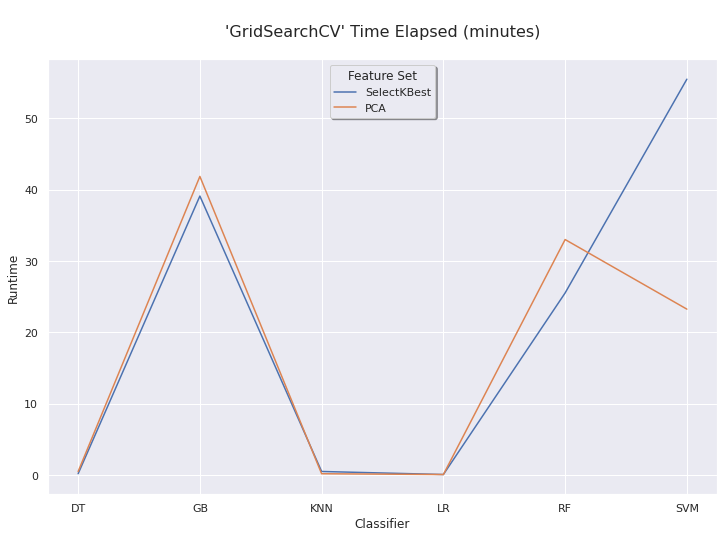

In [0]:
# Get & unpack a list of tuples sorted by dictionary key
x1, y1 = zip(*sorted(run_times_kbest.items()))
x2, y2 = zip(*sorted(run_times_pca.items()))

sns.set()
#sns.set_style('ticks', {'xtick.major.size':8, 'ytick.major.size':8})

plt.figure(figsize = (12,8))
ax = sns.lineplot(x1, np.array(y1)/60, label='SelectKBest', sort=False)
sns.lineplot(x2, np.array(y2)/60, label='PCA', sort=False, ax=ax)
plt.xlabel('Classifier')
plt.ylabel('Runtime')
plt.title("\n'GridSearchCV' Time Elapsed (minutes)\n", {'fontsize':16})
plt.legend(loc='upper center', title='Feature Set', shadow=True)

plt.show();

>During the modeling (training and testing) phase:
* `Support Vector Machines with SelectKBest features` needed nearly $1\ hour$ to learn and predict.
  * It ran 150 fits to find the best parameters.
* `Gradient Boosting Classifier with PCA features` was the second longest running model.
  * It ran 240 fits to find the best parameters.
* `Logistic Regression with PCA features` was the fastest model.
  * It ran 45 fits to find the best parameters.

#### Model Accuracy Comparison

##### Figure 6 - Model Accuracy

>Figure 6.1 - Training Phase Results

>Figure 6.2 - Training and Testing Results

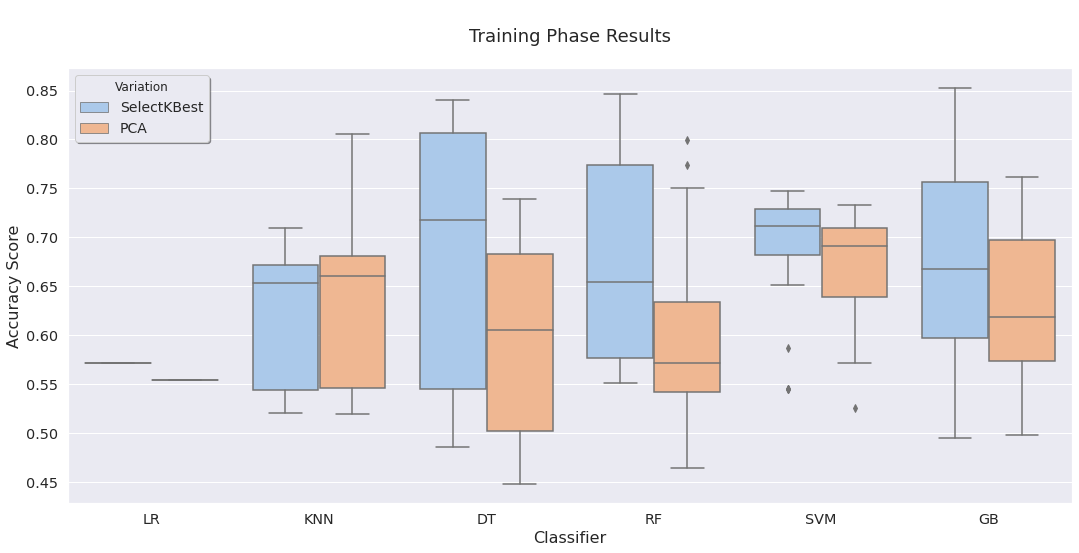

In [0]:
plt.figure(figsize=(18,8))

sns.boxplot(
    x='Model',
    y='CV_Score',
    hue="Feature_Variation",
    data=results,
    palette='pastel',
    linewidth=1.5,
)

plt.xlabel('Classifier', {'fontsize':16})
plt.ylabel('Accuracy Score', {'fontsize':16})
plt.tick_params(axis='both', labelsize='large')
plt.title("\nTraining Phase Results\n", {'fontsize':18})
plt.legend(loc='upper left', title='Variation', shadow=True, fontsize=14)

plt.show();

>Each model varied in their respective performances during the training portion of the modeling phase.
* The box plots in this figure provide some insight into those results by displaying the range of accuracy scores resulting from the `GridSearchCV` implementation.
* These scores were calculated across various splits during the 5-Fold Cross Validation, and have been separated by feature variation.

>Most noticeable observations:
* The `Logistic Regression` model had the most consistent results.
* Almost all models with `SelectKBest` features had a higher maximum and a wider range of values.

In [0]:
results_acc = pd.DataFrame(data=None, columns=['Model', 'Acc_Score'])

acc_k = {m: accuracy_score(y_test, y_) for m,y_ in y_pred_kbest.items()}
FV = 'SelectKBest (Testing Set)'
for MI, acc_score in acc_k.items():
  results_acc = pd.concat(
      [results_acc,
       pd.DataFrame(
           {'Model': MI,
            'Feature_Variation': FV,
            'Acc_Score': [acc_score]})]
  )

acc_p = {m: accuracy_score(y_test, y_) for m,y_ in y_pred_pca.items()}
FV = 'PCA (Testing Set)'
for MI, acc_score in acc_p.items():
  results_acc = pd.concat(
      [results_acc,
       pd.DataFrame(
           {'Model': MI,
            'Feature_Variation': FV,
            'Acc_Score': [acc_score]})]
  )


results_acc

,Model,Acc_Score,Feature_Variation
0,LR,0.501777,SelectKBest (Testing Set)
0,KNN,0.563611,SelectKBest (Testing Set)
0,DT,0.603412,SelectKBest (Testing Set)
0,RF,0.677328,SelectKBest (Testing Set)
0,SVM,0.658849,SelectKBest (Testing Set)
0,GB,0.647477,SelectKBest (Testing Set)
0,LR,0.501777,PCA (Testing Set)
0,KNN,0.563611,PCA (Testing Set)
0,DT,0.610519,PCA (Testing Set)
0,RF,0.574982,PCA (Testing Set)


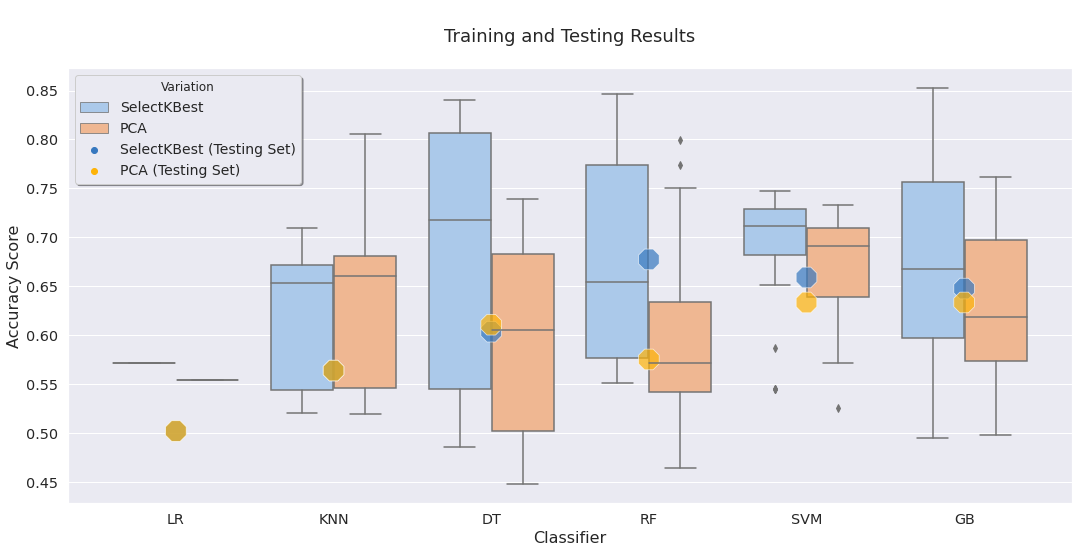

In [0]:
plt.figure(figsize=(18,8))

ax = sns.boxplot(
    x='Model',
    y='CV_Score',
    hue="Feature_Variation",
    data=results,
    palette='pastel',
    linewidth=1.5,
)

sns.scatterplot(
    x="Model",
    y="Acc_Score",
    hue="Feature_Variation",
    data=results_acc,
    palette=sns.xkcd_palette(["windows blue", "amber"]),
    s=500,
    marker='8',
    alpha=0.70,
    ax=ax,
)

plt.xlabel('Classifier', {'fontsize':16})
plt.ylabel('Accuracy Score', {'fontsize':16})
plt.tick_params(axis='both', labelsize='large')
plt.title("\nTraining and Testing Results\n", {'fontsize':18})

# Customize Legend
handles, labels = ax.get_legend_handles_labels()
del handles[2]; del labels[2];
plt.legend(
    handles=handles,
    labels=labels,
    loc='upper left',
    fontsize=14,
    shadow=True,
    title='Variation',
)

plt.show();

>Excluding `Logistic Regression`, each score for the testing set was within the accuracy range of the training set.

>There is a slightly upward trend, implying that the models on the right performed better than those on the left.
* However, as illustrated through aforementioned examples and explanations, the accuracy score alone doesn't provide all of the useful details.
* The `Logistic Regression` has the lowest accuracy score overall, yet it correctly predicted the `Yes churn` minority class more often than all other classifiers.

#### `F1 Scores`

Models with `SelectKBest` features

>LR
* no = 0.55
* yes = 0.46
  * 9% difference

>KNN
* no = 0.68
* yes = 0.30
  * 38% difference

>DT
* no = 0.73
* yes = 0.26
  * 47% difference

>RF
* no = 0.79
* yes = 0.31
  * 48% difference

>SVM
* no = 0.78
* yes = 0.24
  * 54% difference

>GB
* no = 0.77
* yes = 0.25
  * 52% difference

---

Models with `PCA` features

>LR
* no = 0.54
* yes = 0.46
  * 8% difference

>KNN
* no = 0.69
* yes = 0.27
  * 42% difference

>DT
* no = 0.73
* yes = 0.29
  * 44% difference

>RF
* no = 0.70
* yes = 0.28
  * 42% difference

>SVM
* no = 0.76
* yes = 0.25
  * 51% difference

>GB
* no = 0.76
* yes = 0.22
  * 54% difference

#### Top Ranked Models

##### Best Scores for models with `SelectKBest` features:


. . . . .


$1^{st}\ Place$
>`Logistic Regression` had the smallest `F1 Score` difference and lowest $FP$ count.
* Runtime $< 7\ seconds$
* The `F1 Score` for `No` was $55$%.
* The `F1 Score` for `Yes` was $46$%.
  * This $9$% difference, which was the second smallest among all 12 models, indicates good consistency in the performance when predicting both target outcomes.
  * However, each of these `F1 Scores` are averagely poor relative to the best possible value (the ratio of $1$, which corresponds to 100%).
  * This model had the lowest count for **false negatives**, and missed $23$% of customers who `churned`.


. . . . .


$2^{nd}\ Place$
>`K-Nearest Neighbors` had the _second smallest_ `F1 Score`.
* Runtime $< 33\ seconds$
* The `F1 Score` for `No` is $68$%.
* The `F1 Score` for `Yes` is $30$%.
  * $38$% difference in scores
  * This model had the _second lowest_ count for **false negatives**, and missed $65$% of customers who `churned`.


. . . . .


>Overall, the remaining classifiers varied in _runtime_, had relatively higher _accuracy scores (testing set)_, yet predicted the `Yes` outcome poorly relative to these two models.
* Each of the other models in this feature variation failed to predict over $70$% of the customers who `churned`.


---

##### Best Scores for models with `PCA` features:


. . . . .


$1^{st}\ Place$
>`Logistic Regression` had the smallest `F1 Score` difference and lowest $FP$ count.
* Runtime $< 7\ seconds$
* The `F1 Score` for `No` was $54$%.
* The `F1 Score` for `Yes` was $46$%.
  * This $8$% difference, which was the smallest among all 12 models, indicates good consistency in the performance when predicting both target outcomes.
  * However, each of these `F1 Scores` are averagely poor relative to the best possible value (the ratio of $1$, which corresponds to 100%).
  * This model had the lowest count for **false negatives**, and missed $23$% of customers who `churned`.


. . . . .


$2^{nd}\ Place$
>`K-Nearest Neighbors` and `Random Forest` were tied for the _second smallest_ `F1 Score`.
* However, each score for `Random Forest` was higher by $1$%, thus it will be ranked as number 2 for `PCA-based` models.
* `RF` Runtime $< 33\ minutes$
* The `F1 Score` for `No` is $70$%.
* The `F1 Score` for `Yes` is $28$%.
  * $42$% difference in scores
  * This model missed $69$% of customers who `churned`.


. . . . .


>Overall, the remaining classifiers varied in _runtime_, had relatively higher _accuracy scores (testing set)_, yet predicted the `Yes` outcome poorly relative to these two models.
* Each of the other models in this feature variation failed to predict over $70$% of the customers who `churned`.


---

#### Best Model

>`Logistic Regression with PCA features` performed the best.
* It was the fastest model, and correctly predicted the most customers who `churned`.
* $6.4746$ seconds
* 87 missed `churned` customers

>The second best performer was the `Logistic Regression with SelectKBest features`.
* $6.6199$ seconds
* 90 missed `churned` customers

# Discussion

>Overall, an ideal model should:
* Be relatively consistent such that performance is (similarly) good for both the training data and the new data.
* Avoid overfitting and underfitting training data.
* Have a good accuracy score while correctly predicting most outcomes for both categories (no churn, yes churn).
  * For this application, the accuracy score alone was an insufficient evaluation metric.
  * As such, an ideal model would maximize the pair of F1 Scores while minimizing the difference between each score (`F1 Score for "No"` and the `F1 Score for "Yes"`).

>Although all models performed poorly overall, `Logistic Regression with PCA features` performed better than all other models (including `SelectKBest features` and `PCA features`). Being the fastest model, it had a runtime of less than $7$ seconds, and correctly predicted $77$% of customers who would `churn`.

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


#### Interested parties can use these results to gain insight to _which factors, on average, contribute most to a customer's decision to churn or stay_, along with _the performances of six machine learning models (across two variations) generated to predict a customer's decision_.

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


#### Further research is needed to see how other factors may affect a customer's decision. The combined research results would enable interested parties to make research-driven decisions and track the progress of implementation.

## Other Considerations

### Optimizing the Balance between Precision and Recall

>For the purpose of this project, "No Churn" (negatives) and "Yes Churn" (positives) had equal importance during the evaluation phase. Thus, precision and recall were considered to be equally important. Further research could include variations of this; as an example, recall could be weighted more than precision by a factor of beta in the calculation of the F-Beta Score.

>To navigate trade-offs between these two metrics, further evaluation can also occur through a precision-recall curve, which outlines the relationship between precision and recall as the desired threshold is varied from 0 to 1 (the ideal value).


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

### Optimizing Computational Power

>A Cross Validation Grid Search is a powerful approach for iteratively testing multitudes of parameter candidates. Further training and testing could be implemented by executing a memory-efficient program on a technologically well-crafted computer or cloud based platform.


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

### Recommended Updates for Data Collection

>The `Tenure` data provided the _duration_ of maintained customer status. However, the respective _start_ and _end_ dates are not provided. Further research should be conducted to uncover additional patterns regarding dated churn status and dated prices (or payments). As an example, several customers might discontinue their contracts due to relatively high-priced services; after which, a company might offer a significant discount to get new customers to sign-up quickly. Underlying value might also exist in tracked payments; for example, some customers who are frequently late on payments might be more likely to churn than others.


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


>For future data collection processes, tracking some or all of the following items could help avoid adverse effects in data analysis and interpretation:
* Timing and Quality of Services
  * _At which time(s) of the year were customers churning or joining, respectively?_
  * _At which time(s) of the year were discounts offered by a given company?_
  * _How were the services rated by the customers?_
  * _How did these ratings change over time?_

>These questions outline how the sample population of customers may differ from the desired (actual) population, along with secondary metrics that could provide insight into the observed outcomes. Without knowing the answers to these questions, it's unclear how one could test for _sampling / selection bias_.


---

## Next Steps for Further Research

1. Train and test other models on the given data.
2. Explore the relationship of how customer churn changed over time.
3. Investigate various aspects of churn-rates around the time(s) that other services or deals were offered.
4. Train and test all models with additional data (more customer records, more factors, etc.).
5. Expand on the variations for evaluation metrics and tools.
6. Based on those research results, discuss the newly discovered patterns surrounding customer churn and retention.